# 1. Variable Transformation

### 1.1 Skew to normal

#### Log Transform

In [ ]:
### Logarithmic transformation
df2['Age_log'] = np.log(df2.Age)

#### Reciporal transform

In [ ]:
### Reciprocal transformation
df2['Age_reciprocal'] = 1 / df2.Age

#### Square root transform

In [ ]:
df2['Age_sqr'] = df2.Age**(1/2)

#### Exponential transform

In [ ]:
df2['Age_exp'] = df2.Age**(1/1.2) # you can vary the exponent as needed

#### Boxcox transform

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

In [ ]:
df2['Age_boxcox'], param = stats.boxcox(df2.Age) 

------------------------------------------------------------------------------

# 2. Mixed Vars

### 2.1. Type 1 

They contain numbers OR strings on different observations

In [3]:
data.open_il_24m.unique()

array(['C', 'A', 'B', 0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 9.0, 7.0, 8.0,
       13.0, 10.0, 19.0, 11.0, 12.0, 14.0, 15.0], dtype=object)

#### Engineering mixed types of variables

The categorical variable captures the categorical part of the mixed original variable. Where the categorical variable contains a value, the numerical variable contains NA, and vice versa

In [6]:
# we create 2 variables, a numerical one containing the numerical part, and
# a categorical variable with the codes (strings)

data['open_il_24m_numerical'] = np.where(data.open_il_24m.str.isdigit(), data.open_il_24m, np.nan)
data['open_il_24m_categorical'] = np.where(data.open_il_24m.str.isdigit(), np.nan, data.open_il_24m,)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,A,NaN,A
2,1077175,A,NaN,A
3,1076863,A,NaN,A
4,1075358,A,NaN,A


### 2.2. Type 2

They contains both numbers and strings in the same observation. Perhaps, if we separate them, we can add some information to the dataset.

In [8]:
# let's load again the titanic dataset for demonstration

data.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


#### Cabin

In [9]:
# for Cabin, it is relatively straightforward, we can extract the letters and the numbers in different variables

data['Cabin_numerical'] = data.Cabin.str.extract('(\d+)') # captures numerical part
data['Cabin_categorical'] = data['Cabin'].str[0] # captures the first letter

data[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85,C
2,NaN,NaN,NaN
3,C123,123,C
4,NaN,NaN,NaN


#### Ticket

In [11]:
# extract the last bit of ticket as number
data['Ticket_numerical'] = data.Ticket.apply(lambda s: s.split()[-1])
data['Ticket_numerical'] = np.where(data.Ticket_numerical.str.isdigit(), data.Ticket_numerical, np.nan)

# extract the first part of ticket as category
data['Ticket_categorical'] = data.Ticket.apply(lambda s: s.split()[0])
data['Ticket_categorical'] = np.where(data.Ticket_categorical.str.isdigit(), np.nan, data.Ticket_categorical)

data[['Ticket', 'Ticket_numerical','Ticket_categorical']].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171,A/5
1,PC 17599,17599,PC
2,STON/O2. 3101282,3101282,STON/O2.
3,113803,113803,NaN
4,373450,373450,NaN
5,330877,330877,NaN
6,17463,17463,NaN
7,349909,349909,NaN
8,347742,347742,NaN
9,237736,237736,NaN


In [12]:
# let's compare the number of categories of the newly designed variables

print('Ticket_original no of labels: ', len(data.Ticket.unique()))
print('Cabin_original no of labels: ', len(data.Cabin.unique()))

print('Ticket_categorical no of labels: ', len(data.Ticket_categorical.unique()))
print('Cabin_categorical no of labels: ', len(data.Cabin_categorical.unique()))


Ticket_original no of labels:  681
Cabin_original no of labels:  148
Ticket_categorical no of labels:  44
Cabin_categorical no of labels:  9


We can see how we reduced quite a bit the number of categories with this simple pre-processing of the variables. Whether these newly designed variables are or not predictive of survival, remains to be tested, built machine learning algorithms with these new variables, and see if they boost the performance.

#### Extract numerical part and categorical part

In [170]:
import re 

def LetterPart_Extraction(init_string):
    # letter_part = " ".join(re.findall("[a-zA-Z]+", ini_string)) 
    letter_part = ''.join(filter(lambda chr: chr.isalpha(), init_string))
    return letter_part

def NumberPart_Extraction(init_string):
    # number_part = [int(s) for s in init_string.split() if s.isdigit()]
    number_part = ''.join(filter(lambda i: i.isdigit(), init_string))
    # number_part = list(map(int, re.findall(r'\d+', init_string))) 
    return number_part

X_train['Model_categorical'] = X_train.Model.apply(lambda x:LetterPart_Extraction(x))
X_train['Model_numerical'] = X_train.Model.apply(lambda x:NumberPart_Extraction(x))

X_test['Model_categorical'] = X_test.Model.apply(lambda x:LetterPart_Extraction(x))
X_test['Model_numerical'] = X_test.Model.apply(lambda x:NumberPart_Extraction(x))
X_train.head(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,Year_disc_label,Year_disc,Year_disc_ordered,Mileage_disc_label,Mileage_disc,Mileage_disc_ordered,log_EngineV,transformed_Year,Model_categorical,Model_numerical,BMW_numerical,MB_numerical,Audi_numerical,Toyota_numerical,Renault_numerical,Volkswagen_numerical,Mitsubishi_numerical
0,BMW,other,136,2.4,Petrol,yes,2008,523,1,Q6,"(2007.0, 2009.0]",5,Q9,"(133.0, 146.0]",11,0.875469,44.810713,,523,523.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,BMW,sedan,237,3.0,Diesel,yes,2003,530,0,Q3,"(2001.0, 2004.0]",2,Q16,"(230.0, 250.0]",4,1.098612,44.754888,,530,530.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,Renault,vagon,170,1.5,Diesel,yes,2004,Kangoo,0,Q3,"(2001.0, 2004.0]",2,Q11,"(157.5, 170.0]",9,0.405465,44.766059,Kangoo,,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,Toyota,crossover,40,2.7,Petrol,yes,2011,Land Cruiser Prado,1,Q7,"(2009.0, 2011.0]",7,Q3,"(25.0, 53.0]",18,0.993252,44.844175,LandCruiserPrado,,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
4,Renault,van,285,1.9,Diesel,yes,2002,Trafic,0,Q3,"(2001.0, 2004.0]",2,Q18,"(270.0, 298.0]",1,0.641854,44.743715,Trafic,,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


------------------------------------------------------------------------------

# 3. Discretisation

## 3.1. Equal frequency discretisation

Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

### 3.1.1.  Age

**How does survival correlate with Age?**

We can determine the relation between survival and Age by plotting the mean survival per Age. In this case, I will calculate the Survival rate per each year of Age. See below.

Text(0, 0.5, 'Survived')

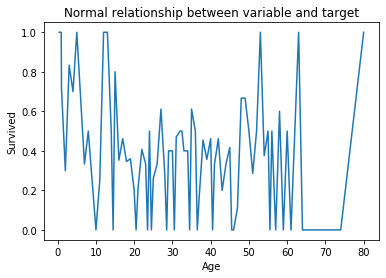

In [11]:
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

By looking at the plot, we get an intuition that younger people (children) were more likely to survive (see higher survival rates at ages below 10 and 10-15). However, it looks like children of 10 years of age, had a very low survival chance. This does not make a lot of sense and most likely indicates that our 10 year old sample is not big enough and then the survival rate is underestimated. Let's see below.

Text(0, 0.5, 'Survived')

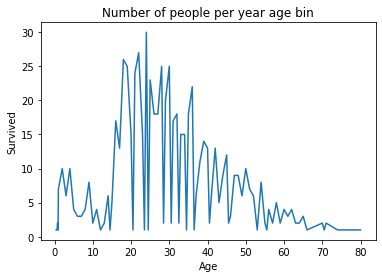

In [12]:
# here I plot the number of passengers within each 1 year age bucket / bin
fig = plt.figure()
fig = df2.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

As we suspected, **there were very few children at the age of 10** on the Titanic. If none of them or only half of the 10 year old children survived, we would be led to think that being 10 years old decreased your chances of survival, when in reality, there were only 2 children of the age that were not lucky enough  to survive, therefore leading to underestimation of survival rate.

By grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger. Let's see below.

#### Discretisation with quantiles

In [13]:
# Divide Age in 5 bins, use the qcut (quantile cut) function from pandas and I indicate that I want 4 cutting points, thus 5 bins.
# retbins= True indicates that I want to capture the limits of each interval (so I can then use them to cut the test set)

Age_disccretised, intervals = pd.qcut(df2.Age, 4, labels=None, retbins=True, precision=3, duplicates='raise')
pd.concat([Age_disccretised, df2.Age], axis=1).head(10)

,Age,Age
0,"(20.125, 28.0]",22.0000
1,"(28.0, 38.0]",38.0000
2,"(20.125, 28.0]",26.0000
3,"(28.0, 38.0]",35.0000
4,"(28.0, 38.0]",35.0000
5,NaN,nan
6,"(38.0, 80.0]",54.0000
7,"(0.419, 20.125]",2.0000
8,"(20.125, 28.0]",27.0000
9,"(0.419, 20.125]",14.0000


We can see in the above output how by discretising using quantiles, we placed each Age observation within one interval. For example, age 22 was placed in the 20-28 interval, whereas age 38 was placed into the 28-28 interval. We can visualise the interval cut points below.

In [14]:
intervals

array([ 0.42 , 20.125, 28.   , 38.   , 80.   ])

And because we generated the bins using the quantile cut method, we should have roughly the same amount of observations per bin. See below.

In [15]:
# calculate number of passengers per bin
temp = pd.concat([Age_disccretised, df2.Age], axis=1)
temp.columns = ['Age_discretised', 'Age']
temp.groupby('Age_discretised')['Age'].count()

Age_discretised
(0.419, 20.125]    179
(20.125, 28.0]     183
(28.0, 38.0]       175
(38.0, 80.0]       177
Name: Age, dtype: int64

In [16]:
# we can also add labels instead of having the interval boundaries, to the bins, as follows:

Age_disccretised, intervals = pd.qcut(df2.Age, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'], retbins=True, precision=3, duplicates='raise')
Age_disccretised.head()

0    Q2
1    Q3
2    Q2
3    Q3
4    Q3
Name: Age, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [17]:
# and now, I will divide into 10 quantiles for the rest of the exercise. I will leave the quantile
# boundary and generate labels as well for comparison

# create 10 labels, one for each quantile
labels = ['Q'+str(i+1) for i in range(0,10)]
print(labels)

# bins with labels
X_train['Age_disc_label'], bins = pd.qcut(x=X_train.Age, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['Age_disc'], bins = pd.qcut(x=X_train.Age, q=10, retbins=True, precision=3, duplicates='raise')


X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


,Age,Fare,Survived,Age_disc_label,Age_disc
857,51.0000,26.5500,1,Q10,"(49.0, 80.0]"
52,49.0000,76.7292,1,Q9,"(41.6, 49.0]"
386,1.0000,46.9000,0,Q1,"(0.669, 13.2]"
124,54.0000,77.2875,0,Q10,"(49.0, 80.0]"
578,14.5000,14.4583,0,Q2,"(13.2, 19.0]"
549,8.0000,36.7500,1,Q1,"(0.669, 13.2]"
118,24.0000,247.5208,0,Q4,"(22.0, 26.0]"
12,20.0000,8.0500,0,Q3,"(19.0, 22.0]"
157,30.0000,8.0500,0,Q6,"(29.0, 32.0]"
127,24.0000,7.1417,1,Q4,"(22.0, 26.0]"


Age 51 was placed into the 49-80 bucket, which is also the last bucket (Q10) in our distribution, as it contains the majority of the elder people. The age of 8 was placed into the 0-13 bucket, which is the first interval (Q1) of the discretised variable. And below the interval limits.

In [18]:
bins

array([ 0.67, 13.2 , 19.  , 22.  , 26.  , 29.  , 32.  , 36.  , 41.6 ,
       49.  , 80.  ])

To divide the test set, we will use the cut method of pandas, and we will pass the interval edges above. 

As with all feature engineering methods, the limits of the intervals should be set on the training set, and then propagated to the test set. We should not calculate the quantiles in the test set. We should use the limits estimated using the train set data. If the distributions are similar, we should expect to have roughly the same amount of observations in each age bucket in the test set as well.

In [19]:
# we use pandas cut method and pass the quantile edges calculated in the training set
X_test['Age_disc_label'] = pd.cut(x = X_test.Age, bins=bins, labels=labels)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=bins)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc
495,42.0000,14.4583,0,Q9,"(41.6, 49.0]"
648,18.0000,7.5500,0,Q2,"(13.2, 19.0]"
278,7.0000,29.1250,0,Q1,"(0.67, 13.2]"
31,35.0000,146.5208,1,Q7,"(32.0, 36.0]"
255,29.0000,15.2458,1,Q5,"(26.0, 29.0]"


In [20]:
# let's check that we have equal frequency (equal number of observations per bin)
X_test.groupby('Age_disc')['Age'].count()

Age_disc
(0.67, 13.2]    26
(13.2, 19.0]    38
(19.0, 22.0]    24
(22.0, 26.0]    33
(26.0, 29.0]    21
(29.0, 32.0]    25
(32.0, 36.0]    22
(36.0, 41.6]    22
(41.6, 49.0]    23
(49.0, 80.0]    32
Name: Age, dtype: int64

#### Discretisation by quantiles guarantees same number of observations in each partition/bin/interval

In [21]:
t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t1

Age_disc
(0.669, 13.2]   0.1011
(13.2, 19.0]    0.1156
(19.0, 22.0]    0.0883
(22.0, 26.0]    0.1140
(26.0, 29.0]    0.0995
(29.0, 32.0]    0.0883
(32.0, 36.0]    0.1091
(36.0, 41.6]    0.0835
(41.6, 49.0]    0.1059
(49.0, 80.0]    0.0947
Name: Survived, dtype: float64

In [22]:
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
t2

Age_disc
(0.67, 13.2]   0.0970
(13.2, 19.0]   0.1418
(19.0, 22.0]   0.0896
(22.0, 26.0]   0.1231
(26.0, 29.0]   0.0784
(29.0, 32.0]   0.0933
(32.0, 36.0]   0.0821
(36.0, 41.6]   0.0821
(41.6, 49.0]   0.0858
(49.0, 80.0]   0.1194
Name: Survived, dtype: float64

In [23]:
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp

,train,test
Age_disc,,
"(0.669, 13.2]",0.1011,nan
"(0.67, 13.2]",nan,0.0970
"(13.2, 19.0]",0.1156,0.1418
"(19.0, 22.0]",0.0883,0.0896
"(22.0, 26.0]",0.1140,0.1231
"(26.0, 29.0]",0.0995,0.0784
"(29.0, 32.0]",0.0883,0.0933
"(32.0, 36.0]",0.1091,0.0821
"(36.0, 41.6]",0.0835,0.0821


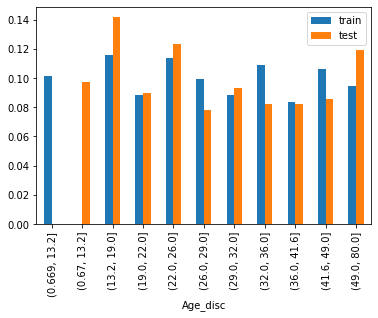

In [24]:
temp.plot.bar()

Indeed, we see roughly the same frequency per interval in both training and testing set.

Text(0, 0.5, 'Survived')

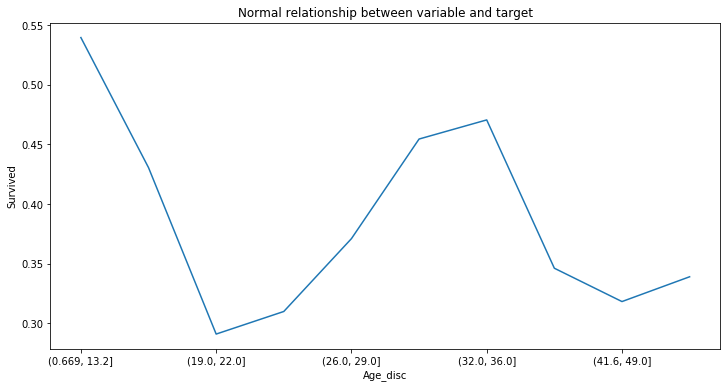

In [25]:
# and now let's observe the relationship between age and survival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Using discretisation we capture more clearly the survival rate according to the age of the passenger. We can see that children (<18) were the most likely to survive, and people in the early 30s as well, potentially mother with children, whereas people between 20-30 and older than 35 were the less likely to survive the tragedy.

Now that we have a discrete variable, we can go ahead and preprocess it as categorical variable, to squeeze a bit more performance out of the machine learning algorithm. Why not ordering the bins according to survival rate?

#### Combine discretisation with label ordering according to target

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [26]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Age_disc_label'])['Survived'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

# remap the intervals to the encoded variable
X_train['Age_disc_ordered'] = X_train.Age_disc_label.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_label.map(ordinal_label)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered
857,51.0000,26.5500,1,Q10,"(49.0, 80.0]",3
52,49.0000,76.7292,1,Q9,"(41.6, 49.0]",2
386,1.0000,46.9000,0,Q1,"(0.669, 13.2]",9
124,54.0000,77.2875,0,Q10,"(49.0, 80.0]",3
578,14.5000,14.4583,0,Q2,"(13.2, 19.0]",6


Text(0, 0.5, 'Survived')

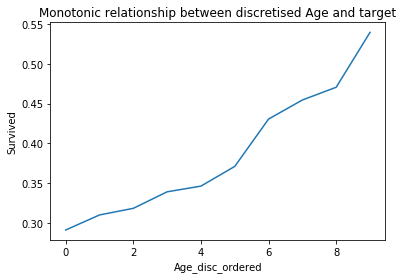

In [27]:
# plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().sort_values(ascending = True).plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

Go ahead and compare the performance machine learning algorithms using the original distribution of Age, Age discretised using quantiles and Age in quantiles followed by ordering according to Survival rate. Enjoy!

### 3.1.2. Fare

Let's look at the benefit that can be bought forward by equal frequency discretisation on highly skewed variables like Fare.

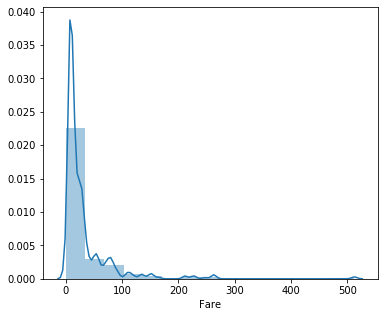

In [28]:
plt.figure(figsize=(6,5))
sns.distplot(df2['Fare'], kde=True, bins=15)

Text(0, 0.5, 'Survived')

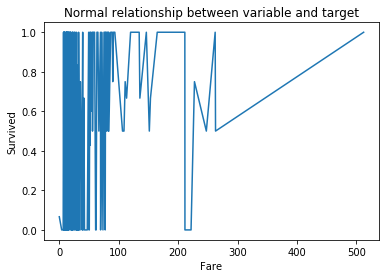

In [29]:
# let's plot survival rate per ticket price
fig = plt.figure()
fig = df2.groupby(['Fare'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

The relationship between Fare and survival is not very clear from this plot. It looks very noisy for the lowest fares, and the survival rate was highest for highest fares, however, there were very few people that paid > 500 dollars, so most likely that survival rate is inflated.

Let's go ahead and discretise Fare using equal frequency intervals, and plot again the survival rate and the number of observations within bins.

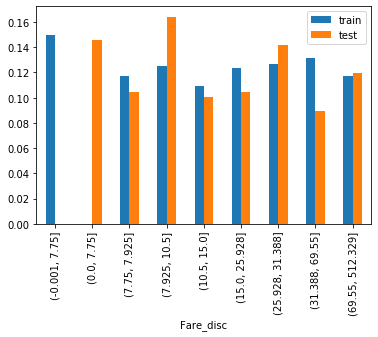

In [30]:
# calculate quantile boundaries on train set and create the discrete variable
X_train['Fare_disc'], bins = pd.qcut(x=X_train.Fare, q=8, retbins=True, precision=3, duplicates='raise')

# cut test set using bin boundaries estimated above
X_test['Fare_disc'] = pd.cut(x = X_test.Fare, bins=bins)

# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
t1 = X_train.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()

Indeed, we have now spread the observations evenly for all the intervals in both train and test set. Let's go ahead and plot the survival rate per Fare once again.

Text(0, 0.5, 'Survived')

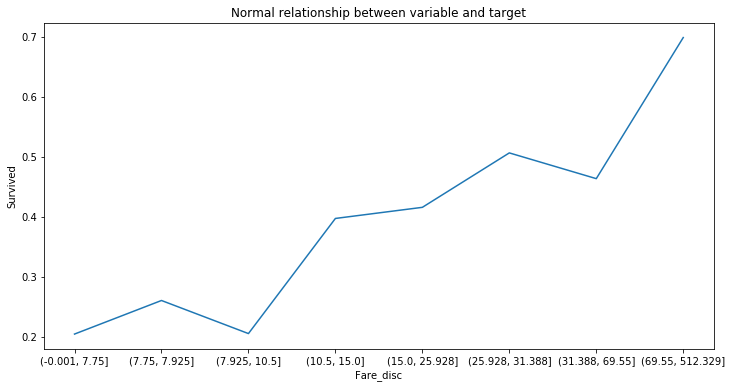

In [31]:
# let's plot survival rate per ticket price bin
fig = plt.figure()
fig = X_train.groupby(['Fare_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Now we get a much clearer view and as we have similar amount of passengers within each bucket, we can be confident that the conclusions are fair. We can see, clearly, that people that paid the highest Fares (>68 dollars) were the most likely to survive, and people who paid the lowest Fares (<10 dollars) were the less likely to survive. Sad but true.

## 3.2. Equal width discretisation

Equal width binning divides the scope of possible values into N bins of the same width. **The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable**.

width = (max value - min value) / N

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

There is no rule of thumb to define N. Typically, we would not want more than 10.

I will demonstrate how to perform equal width binning using the Titanic dataset.

### 3.2.1. Age

#### Discretisation with range

In [35]:
# let's capture the range of the variable age to begin with

Age_range = X_train.Age.max() - X_train.Age.min()
Age_range

79.33

In [36]:
# let's divide the range into 10 equal width bins

Age_range/10

7.933

The range or width of our intervals will be 8 years.

In [37]:
# not let's capture the lower and upper boundaries

min_value = int(np.floor(X_train.Age.min()))
max_value = int(np.ceil(X_train.Age.max()))

# let's round the bin width
inter_value = int(np.round(Age_range/10))

min_value, max_value, inter_value

(0, 80, 8)

In [38]:
# let's capture the interval limits, so we can pass them to the pandas cut function to generate
# the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

In [39]:
# let's make labels to label the different bins
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [40]:
# create binned age

# create one column with labels
X_train['Age_disc_labels'] = pd.cut(x = X_train.Age, bins=intervals, labels=labels, include_lowest=True)

# and one with bin boundaries
X_train['Age_disc'] = pd.cut(x = X_train.Age, bins=intervals, include_lowest=True)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered,Fare_disc,Age_disc_labels
857,51.0000,26.5500,1,Q10,"(48.0, 56.0]",3,"(25.928, 31.388]",Bin_7
52,49.0000,76.7292,1,Q9,"(48.0, 56.0]",2,"(69.55, 512.329]",Bin_7
386,1.0000,46.9000,0,Q1,"(-0.001, 8.0]",9,"(31.388, 69.55]",Bin_1
124,54.0000,77.2875,0,Q10,"(48.0, 56.0]",3,"(69.55, 512.329]",Bin_7
578,14.5000,14.4583,0,Q2,"(8.0, 16.0]",6,"(10.5, 15.0]",Bin_2


We can see in the above output how by discretising using equal width, we placed each Age observation within one interval /bin. For example, age 51 was placed in the 48-56 interval, whereas age 14.5 was placed into the 8-16 interval.

Because we discretised the variable using equal width intervals instead of equal frequency, there won't necessarily be the same amount of passengers in each of the intervals. See below.

In [41]:
X_train.groupby('Age_disc')['Age'].count()

Age_disc
(-0.001, 8.0]     49
(8.0, 16.0]       36
(16.0, 24.0]     147
(24.0, 32.0]     146
(32.0, 40.0]     112
(40.0, 48.0]      68
(48.0, 56.0]      37
(56.0, 64.0]      19
(64.0, 72.0]       7
(72.0, 80.0]       2
Name: Age, dtype: int64

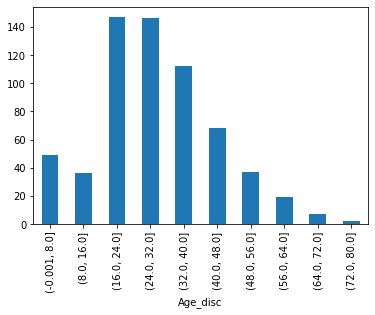

In [42]:
X_train.groupby('Age_disc')['Age'].count().plot.bar()

The majority of people on the Titanic were between 16-40 years of age.

Now, we can discretise Age in the test set, using the same interval boundaries that we calculated for the train set. See below.

In [43]:
X_test['Age_disc_labels'] = pd.cut(x = X_test.Age, bins=intervals, labels=labels, include_lowest=True)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=intervals,  include_lowest=True)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered,Fare_disc,Age_disc_labels
495,42.0000,14.4583,0,Q9,"(40.0, 48.0]",2,"(10.5, 15.0]",Bin_6
648,18.0000,7.5500,0,Q2,"(16.0, 24.0]",6,"(0.0, 7.75]",Bin_3
278,7.0000,29.1250,0,Q1,"(-0.001, 8.0]",9,"(25.928, 31.388]",Bin_1
31,35.0000,146.5208,1,Q7,"(32.0, 40.0]",8,"(69.55, 512.329]",Bin_5
255,29.0000,15.2458,1,Q5,"(24.0, 32.0]",5,"(15.0, 25.928]",Bin_4


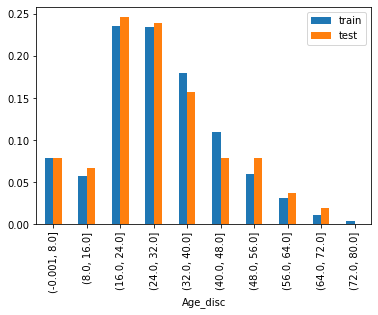

In [44]:
# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
# let's see that below

t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()


Indeed, the proportion of passengers within each bin is roughly the same.

Text(0, 0.5, 'Survived')

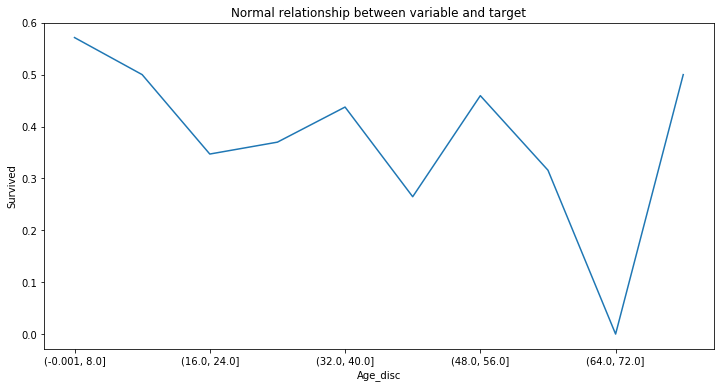

In [45]:
# and now let's observe the relationship between age and surival again, using the discrete Age transformed 
# variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'No of Passengers')

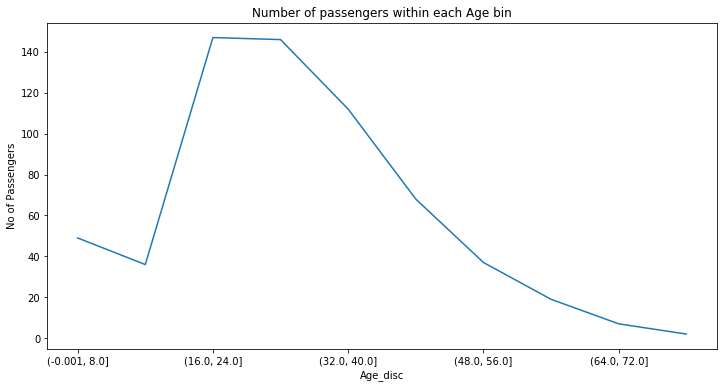

In [46]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].count().plot(figsize=(12,6))
fig.set_title('Number of passengers within each Age bin')
fig.set_ylabel('No of Passengers')

In this case, by dividing Age into bins, we removed some of the noise plotted in the previous graph (a few cells ago) using the untransformed Age. Using the discrete variable Age, we observe as expected that children (<16) had the highest survival chance.

What happens to older people is less clear from the discrete variable. It looks like people between 32-40 and 48-56 are more likely to survive, than people from 40-48. This might or might not be true and more research would be needed to determine if this was the case, what the reason behind it was. In addition, it looks like being extremely old, was very favourable for survival (look at the 72-80 bucket). However, most likely, these are consequences of an arbitrary binning strategy. There are very few people in the bucket 72-80, and thus, the fact that 1 of them survived inflates (overestimates) the survival rate for that bucket. And the same is true for the remaining of the bins, the lowest the amount of observations within buckets, the highest the risk of over or underestimating the target (survival in this case). So we begin to see some of the consequences of this binning strategy.

Similarly to what we did with the equal frequency discretised Age variable in the previous lecture, here as well to squeeze a bit more performance out of the machine learning algorithm, we can add a layer of transformation by sorting the bins using the survival rate (the caveat being that the survival rate may be over or underestimated as we explained in the previous paragraph). But just for a demonstration, let's go ahead. See below.

#### Combine discretisation with label ordering according to target

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [47]:
# order the bins according to survival rate
ordered_labels = X_train.groupby(['Age_disc_labels'])['Survived'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)}

# transformed the discrete age variable
X_train['Age_disc_ordered'] = X_train.Age_disc_labels.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_labels.map(ordinal_label)

Text(0, 0.5, 'Survived')

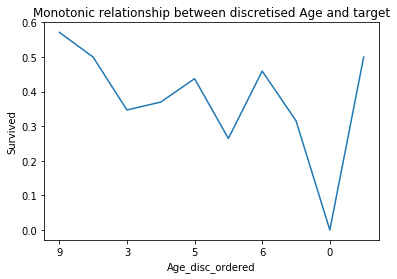

In [48]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

### 3.2.2. Fare

Let's look at the consequences of equal width discretisation on highly skewed variables like Fare.

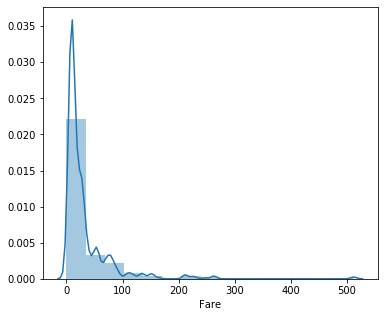

In [49]:
plt.figure(figsize=(6,5))
sns.distplot(X_train['Fare'], kde=True, bins=15)

In [50]:
Fare_range = X_train.Fare.max() - X_train.Fare.min()
Fare_range

512.3292

In [51]:
min_value = int(np.floor(X_train.Fare.min()))
max_value = int(np.ceil(X_train.Fare.max()))
inter_value = int(np.round(Fare_range/10))

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 51, 102, 153, 204, 255, 306, 357, 408, 459, 510, 561]

In [52]:
len(intervals)

12

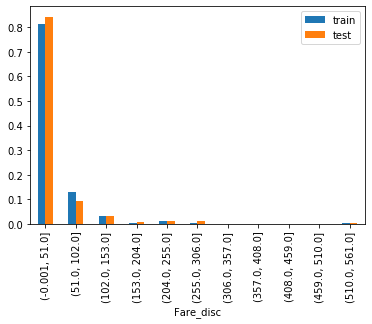

In [53]:
X_train['Fare_disc'] = pd.cut(x = X_train.Fare, bins=intervals, include_lowest=True)
X_test['Fare_disc'] = pd.cut(x = X_test.Fare, bins=intervals, include_lowest=True)

# if the distributions in train and test set are similar, we should expect similar distribution of 
# observations in the different intervals in the train and test set
t1 = X_train.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()

For very skewed variables, discretisation using range is not a good option, as it ends up putting the majority of the observations within 1 or 2 buckets, and the remaining are almost empty or empty.

For very skewed variables, quantile discretisation may be a better choice.

## 3.3. Domain knowledge discretisation

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. These intervals may be defined both arbitrarily or following some criteria of use to the business. Typical examples are the discretisation of variables like Age and Income. 

Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

### 3.3.1. Age

#### Original distribution

In [54]:
df2.Age.describe()

count   714.0000
mean     29.6991
std      14.5265
min       0.4200
25%      20.1250
50%      28.0000
75%      38.0000
max      80.0000
Name: Age, dtype: float64

In [55]:
# let's divide Age into the buckets that we described in the intro cell

# bucket boundaries
buckets = [0,20,40,60,1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df2['Age_buckets_labels'] = pd.cut(df2.Age, bins=buckets, labels = labels, include_lowest=True)
df2['Age_buckets'] = pd.cut(df2.Age, bins=buckets, include_lowest=True)

df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_buckets_labels,Age_buckets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,20-40,"(20.0, 40.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,20-40,"(20.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,"(20.0, 40.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,20-40,"(20.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,20-40,"(20.0, 40.0]"


Above we can observe the buckets into which each Age observation was placed. For example, age 27 was placed into the 20-40 bucket.

Let's explore the number of observations and survival rate per bucket after this arbitrary discretisation method.

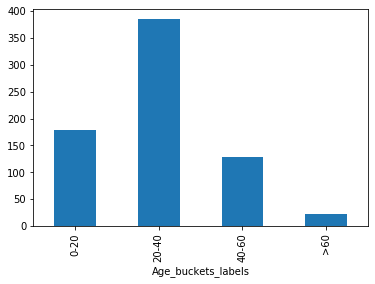

In [57]:
# number of passengers per age bucket
df2.groupby('Age_buckets_labels')['Age'].count().plot.bar()

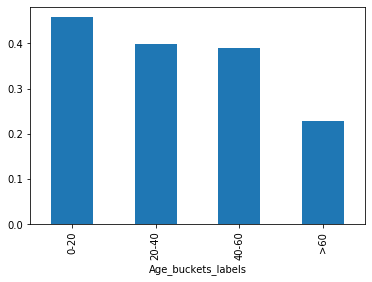

In [58]:
# survival rate per age bucket
df2.groupby('Age_buckets_labels')['Survived'].mean().plot.bar()

The majority of people on the Titanic were between 20-40 years of age. We can see that all the age bins have the same Survival rate. Therefore, most likely, this is not a good method of grouping the Age variable to improve model predictive performance.

**So when would we use a discretisation method like this?**

Well for example, if the business was organising marketing campaigns, and they decide that they will run 4 different marketing campaigns each one targeting each of this buckets, then, dividing age into these groups makes sense for further analysis.

### 3.3.2. annual_inc (Lending Club)

Let's explore discretisation using domain knowledge in a different business scenario. I will use the loan book from the peer to peer lending company Lending Club. This dataset contains information on loans given to people, and the financial characteristics of those people as well as the loan performance.

In [64]:
df1.annual_inc.describe()

count     2260664.0000
mean        77992.4287
std        112696.1996
min             0.0000
25%         46000.0000
50%         65000.0000
75%         93000.0000
max     110000000.0000
Name: annual_inc, dtype: float64

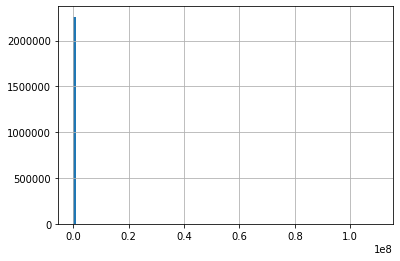

In [65]:
# let's inspect the distribution of Incomes
df1.annual_inc.hist(bins=100)

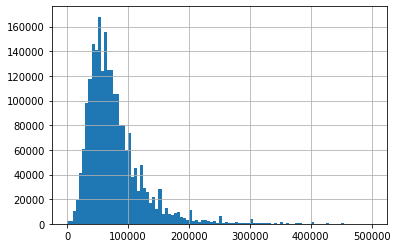

In [67]:
# and now let's look at the lower incomes in more detail
df1[df1.annual_inc<500000].annual_inc.hist(bins=100)

We can see that the majority of the population earns below 150,000. So we may want to make a cap there.

In [68]:
df1[df1.annual_inc<500000].describe()

,annual_inc
count,2256489.0000
mean,76359.1043
std,46930.9115
min,0.0000
25%,46000.0000
50%,65000.0000
75%,93000.0000
max,499992.0000


In [69]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [0,45000,65000,90000,150000,1e10]

# bucket labels
labels = ['0-45k', '45-65k', '65-90k','90-150k', '>150k']

# discretisation
df1['Income_buckets'] = pd.cut(df1.annual_inc, bins=buckets, labels = labels, include_lowest=True)
df1.head()

,annual_inc,Income_buckets
0,55000.0000,45-65k
1,90000.0000,65-90k
2,59280.0000,45-65k
3,92000.0000,90-150k
4,57250.0000,45-65k


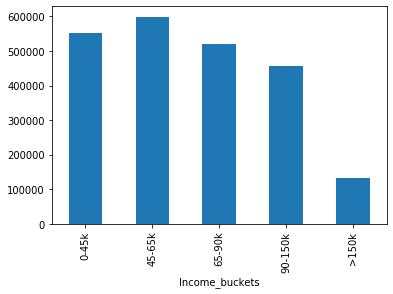

In [71]:
df1.groupby(['Income_buckets'])['annual_inc'].count().plot.bar()

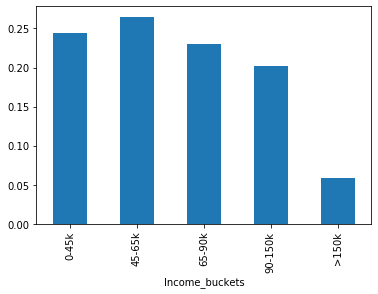

In [73]:
(df1.groupby(['Income_buckets'])['annual_inc'].count()/np.float(len(df1))).plot.bar()

We  have captured ~equal amount of borrowers in each of the first 3 buckets, and we see clearly, that a smaller percentage of the loans were disbursed to high earners.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

-------------------------------------------------------------------------------

# 4. Outlier

### 4.1. Outliers detection

#### Outlier detection for Normally distributed vars

In [140]:
# function to find upper and lower boundaries
# for normally distributed variables


def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [141]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(df4, 'RM')
upper_boundary, lower_boundary

(8.392485817597757, 4.176782957105816)

From the above we conclude that values bigger than 8.4 or smaller than 4.2 occur very rarely for the variable RM. Therefore, we can consider them outliers.

In [142]:
# inspect the number and percentage of outliers for RM

print('total number of houses: {}'.format(len(df4)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(df4[df4['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(df4[df4['RM'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df4[df4['RM'] > upper_boundary]) / len(df4)))

print('% left end outliers: {}'.format(
    len(df4[df4['RM'] < lower_boundary]) / len(df4)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
houses with less than 4.2 rooms (left end outliers: 4

% right end outliers: 0.007905138339920948
% left end outliers: 0.007905138339920948


#### Outlier detection for Skewed vars

In [142]:
# function to find upper and lower boundaries
# for skewed distributed variables


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [146]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df4, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

### 4.2. Top-coding important

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap  the values in the test set.

In [16]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = df2.Fare.quantile(0.75) - df2.Fare.quantile(0.25)

Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

# top-coding: capping the variable Fare at 100
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

100.6563

In [25]:
# because the distribution is not completely normal, I choose to examine outliers with the interquantal
# distance

IQR = data.annual_inc.quantile(0.75) - data.annual_inc.quantile(0.25)

Upper_fence = data.annual_inc.quantile(0.75) + (IQR * 1.5)
Upper_fence_ext = data.annual_inc.quantile(0.75) + (IQR * 3)

Upper_fence, Upper_fence_ext

# top-coding
data['annual_capped'] = np.where(data.annual_inc>210000, 210000, data.annual_inc)


(145709.125, 208218.28000000003)

We see the effect of capping on the overall distribution of the variable. The standard deviation is smaller, and so is the maximum value.

(0, 500000)

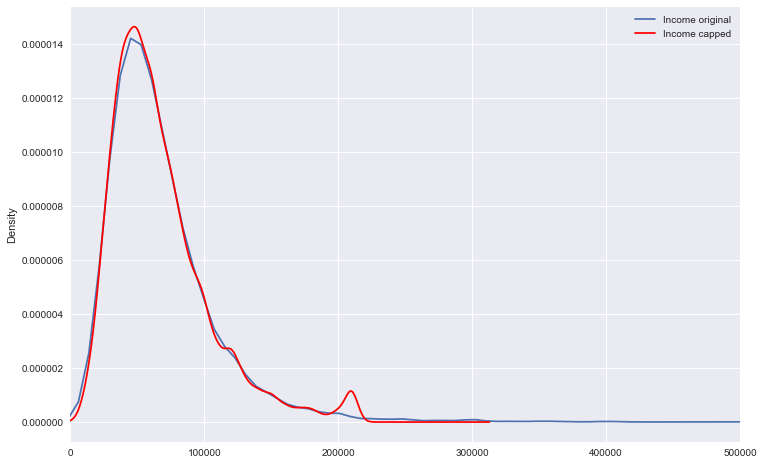

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
data.annual_inc.plot(kind='kde', ax=ax)
data.annual_capped.plot(kind='kde', ax=ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Income original', 'Income capped']
ax.legend(lines, labels, loc='best')
ax.set_xlim(0,500000)

We can observe the effect of top codding on the variable distribution. The maximum value corresponds now to the value we set as a cap. And we observe a peak in that value, that indicates that people that earn more than the cap, are now grouped together under a capped maximum salary.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

------------------------------------------------------------------------------

# 5. Categorical Vars

### 5.1. Quantify cardinality

#### List all categorical vars

In [84]:
cat_vars = [var for var in df2.columns if df2[var].dtypes == 'O' if var not in ['Survived']]
print("\nCategorical vars: ", cat_vars)


Categorical vars:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### Count unique values of categorical vars

In [85]:
cat_feature_df = pd.DataFrame(columns=['Feature','count_distinct_value'])
for e in cat_vars:
    count_distinct = len(df2[e].unique())
    cat_feature_df = cat_feature_df.append({'Feature':e,'count_distinct_value':count_distinct},ignore_index=True)
    
cat_feature_df.sort_values('count_distinct_value',ascending = False)

,Feature,count_distinct_value
0,Name,891
2,Ticket,681
3,Cabin,148
4,Embarked,4
1,Sex,2


While the variable Sex contains only 2 categories and Embarked 4 (low cardinality), the variables Ticket, Name and Cabin, as expected, contain a huge number of different labels (high cardinality).

#### Check unique values for each categorical vars

In [68]:
# only consider categorical vars with num of unique values less than or equal to 20
selected_list = cat_feature_df[cat_feature_df['count_distinct_value'] < 15].Feature.values

def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(df2, var))
    print()

male     0.6476
female   0.3524
Name: Sex, dtype: float64

S   0.7228
C   0.1886
Q   0.0864
Name: Embarked, dtype: float64



#### Standardize labels

In [613]:
# let's explore the ticket categorical part a bit further
df.Ticket_categorical.unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [614]:
# it contains several labels, some of them seem very similar apart from the punctuation
# I will try to reduce this number of labels a bit further

# remove non letter characters from string
text = df.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))

# to visualise the output and compare with input
pd.concat([text, df.Ticket_categorical], axis=1)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
...,...,...
886,nan,NaN
887,nan,NaN
888,WC,W./C.
889,nan,NaN


In [615]:
# set to upper case: we reduce the number of labels quite a bit
text = text.str.upper()
text.unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

In [616]:
# process the variable in submission as well
df['Ticket_categorical'] = text

### 5.2. Convert categories to numbers

In [30]:
def labels_to_numbers(X_train, X_test, columns):
    # function to encode labels into numbers
    # each label will be assigned an ordinal number from 0 onwards
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [31]:
labels_dict = {k:i for i, k in enumerate(X_train['Street'].unique(), 0)}
labels_dict

{'Pave': 0, 'Grvl': 1}

### 5.3. Variables with one dominant category

In [37]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in df3.columns:
    if df3[col].dtypes =='O': # if the variable is categorical
        if len(df3[col].unique())<3: # if the variable has less than 3 categories
            print(df3.groupby(col)[col].count()/np.float(len(df3))) # print percentage of observations per category
            print()

Street
Grvl   0.0041
Pave   0.9959
Name: Street, dtype: float64

Utilities
AllPub   0.9993
NoSeWa   0.0007
Name: Utilities, dtype: float64

CentralAir
N   0.0651
Y   0.9349
Name: CentralAir, dtype: float64



In the first 2 variables, Street and Utilities, the  variables show one dominating category which accounts for more than 99% of the observations. In the third variable, the dominating category is present in more than 90% of the observations.

In cases of variables with one dominating category, engineering the rare label is not an option. One needs to choose between whether to use that variable as it is at all or remove it from the dataset. 

These types of variables often are not useful for our predictions, and we should remove them from the set of features that we are going to use to build machine learning models. There are of course exceptions, for example in those cases in which the target is unbalanced, and therefore, the presence of the rare label is indeed informative. The rare label can also be informative in scenarios where the target is not unbalanced.

Therefore, instead of automating a feature engineering pipeline, perhaps it is better to evaluate these variables individually.

### 5.4. Variables with few categories

In [38]:
# the columns in the below list have only 4 different labels
# let's inspect them

cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
for col in cols:
    print(df3.groupby(col)[col].count()/np.float(len(df3)))
    print()

MasVnrType
BrkCmn    0.0103
BrkFace   0.3048
None      0.5918
Stone     0.0877
Name: MasVnrType, dtype: float64

ExterQual
Ex   0.0356
Fa   0.0096
Gd   0.3342
TA   0.6205
Name: ExterQual, dtype: float64

BsmtCond
Fa   0.0308
Gd   0.0445
Po   0.0014
TA   0.8979
Name: BsmtCond, dtype: float64



The variables above have only 4 categories. And in all three cases, there is at least one category that is infrequent, this is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else. Let's look for example at the first variable MasVnrType. This variable shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label is not an option, because it will leave the variable in the same situation. Replacing of that label by the most frequent category may be done, but ideally, we should first evaluate the distribution of values (for example house prices), within the rare and frequent label. If they are similar, then it makes sense to merge the categories. If the distributions are different however, I would choose to leave the rare label as such and use the original variable without modifications.

Below I will demonstrate the effects of engineering rare labels in variables with few categories.

In [78]:
# let's check if there are missing data

X_train[cols].isnull().sum()

MasVnrType     5
ExterQual      0
BsmtCond      24
dtype: int64

Two of the variables have missing data, so let's replace by the most frequent category as we saw on previous lectures.

#### Let's look at those rare labels

In [41]:
print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn    0.0098
BrkFace   0.2945
None      0.6008
Stone     0.0949
Name: MasVnrType, dtype: float64


The label BrkCmn is present in less than 1% of the observations. Since it is the only category under-represented, creating a new category called 'Rare' to group this label does not make much sense, as the new label Rare will be in essence the same as BrkCmn, and still under-represented. 

Thus, we may choose to replace the rare label by the most frequent category, in this case, 'None'.

In [42]:
# find the most frequent category, I will use this line in the below function
frequent_cat = X_train.groupby('MasVnrType')['MasVnrType'].count().sort_values().tail(1).index.values[0]
frequent_cat

'None'

In [43]:
# find the rare label, I will use this line in the below function
temp = X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train))
[x for x in temp.loc[temp<0.05].index.values]

['BrkCmn']

In [44]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

### 5.5. Variables with high cardinality

In [79]:
# let's explore examples in which variables have several categories, say more than 10
# let's add highly cardinal variables into a list

multi_cat_cols = []
for col in df3.columns:
    if df3[col].dtypes =='O': # if variable  is categorical
        if len(df3[col].unique())>10: # and has more than 10 categories
            multi_cat_cols.append(col)  # add to the list
            print(df3.groupby(col)[col].count()/np.float(len(df3))) # and print the percentage of observations within each category
            print()

Neighborhood
Blmngtn   0.0116
Blueste   0.0014
BrDale    0.0110
BrkSide   0.0397
ClearCr   0.0192
CollgCr   0.1027
Crawfor   0.0349
Edwards   0.0685
Gilbert   0.0541
IDOTRR    0.0253
MeadowV   0.0116
Mitchel   0.0336
NAmes     0.1541
NPkVill   0.0062
NWAmes    0.0500
NoRidge   0.0281
NridgHt   0.0527
OldTown   0.0774
SWISU     0.0171
Sawyer    0.0507
SawyerW   0.0404
Somerst   0.0589
StoneBr   0.0171
Timber    0.0260
Veenker   0.0075
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng   0.0137
AsphShn   0.0007
BrkComm   0.0014
BrkFace   0.0342
CBlock    0.0007
CemntBd   0.0418
HdBoard   0.1521
ImStucc   0.0007
MetalSd   0.1507
Plywood   0.0740
Stone     0.0014
Stucco    0.0171
VinylSd   0.3527
Wd Sdng   0.1411
WdShing   0.0178
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng   0.0137
AsphShn   0.0021
Brk Cmn   0.0048
BrkFace   0.0171
CBlock    0.0007
CmentBd   0.0411
HdBoard   0.1418
ImStucc   0.0068
MetalSd   0.1466
Other     0.0007
Plywood   0.0973
Stone     0.0034
Stucco  

In [80]:
# let's inspect our highly cardinal variable names
multi_cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

From the above frequency distributions we observe that for each of the three variables, there are many categories that are rare.

In [81]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

In [82]:
# let's go ahead and impute rare categories

for col in multi_cat_cols:
    rare_imputation(X_train, X_test, col)

In [83]:
# let's inspect the original distribution for the variable Neighborhood
X_train.groupby('Neighborhood')['Neighborhood'].count()/np.float(len(X_train))

Neighborhood
Blmngtn   0.0117
Blueste   0.0020
BrDale    0.0098
BrkSide   0.0401
ClearCr   0.0235
CollgCr   0.1027
Crawfor   0.0342
Edwards   0.0695
Gilbert   0.0538
IDOTRR    0.0235
MeadowV   0.0117
Mitchel   0.0352
NAmes     0.1477
NPkVill   0.0068
NWAmes    0.0499
NoRidge   0.0294
NridgHt   0.0499
OldTown   0.0714
SWISU     0.0176
Sawyer    0.0597
SawyerW   0.0440
Somerst   0.0548
StoneBr   0.0157
Timber    0.0294
Veenker   0.0059
Name: Neighborhood, dtype: float64

In [84]:
# and now the modified distribution after rare imputation into rare category
X_train.groupby('Neighborhood_rare_imp')['Neighborhood_rare_imp'].count()/np.float(len(df2))

Neighborhood_rare_imp
CollgCr   0.1178
Edwards   0.0797
Gilbert   0.0617
NAmes     0.1695
OldTown   0.0819
Rare      0.5051
Sawyer    0.0685
Somerst   0.0629
Name: Neighborhood_rare_imp, dtype: float64

We can see that the number of different labels has decreased substantially.

In [86]:
# let's inspect the modified distribution after rare imputation into most frequent category

X_train.groupby('Neighborhood_freq_imp')['Neighborhood_freq_imp'].count()/np.float(len(df3))

Neighborhood_freq_imp
CollgCr   0.0719
Edwards   0.0486
Gilbert   0.0377
NAmes     0.4116
OldTown   0.0500
Sawyer    0.0418
Somerst   0.0384
Name: Neighborhood_freq_imp, dtype: float64

Again, imputation reduced the number of labels dramatically for this variable.

In [87]:
# let's create different variable lists for training random forests with the different imputation methods

cols_freq = [x+'_freq_imp' for x in multi_cat_cols]
cols_rare = [x+'_rare_imp' for x in multi_cat_cols]

cols_rare

['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']

In [115]:
use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
df3 = org_df3[use_cols].copy()

df3.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [116]:
cat_feature_df = pd.DataFrame(columns=['Feature','count_distinct_value'])
for e in df3.drop(['SalePrice'],axis=1):
    count_distinct = len(df3[e].unique())
    cat_feature_df = cat_feature_df.append({'Feature':e,'count_distinct_value':count_distinct},ignore_index=True)
    
cat_feature_df.sort_values('count_distinct_value',ascending = False)

,Feature,count_distinct_value
0,Neighborhood,25
2,Exterior2nd,16
1,Exterior1st,15


The variable 'Neighborhood' shows 25 different values, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

### 5.6. Inspect relationship between rare lables and target

In the following cells, I want to understand the mean SalePrice per group of houses that display each categories.

In [119]:
# the following function calculates:

# 1) the percentage of houses per category
# 2) the mean SalePrice per category


def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,how='left')

    return temp_df

In [120]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(df3, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.1541,145847.0800
1,CollgCr,0.1027,197965.7733
2,OldTown,0.0774,128225.3009
3,Edwards,0.0685,128219.7000
4,Somerst,0.0589,225379.8372
5,Gilbert,0.0541,192854.5063
6,NridgHt,0.0527,316270.6234
7,Sawyer,0.0507,136793.1351
8,NWAmes,0.0500,189050.0685
9,SawyerW,0.0404,186555.7966


The above dataframe contains the percentage of houses that show each one of the labels in Neighborhood, and the mean SalePrice for those group of houses. In other words, ~15% of houses are in NAmes and the mean SalePrice is 145847.

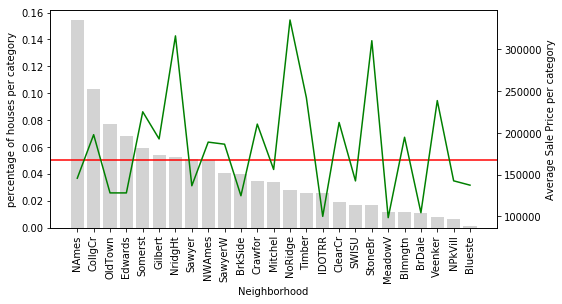

In [121]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()
    
plot_categories(temp_df, 'Neighborhood')

Houses in the 'Neighborhood' of 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in the 'Neighborhood' of StoneBr have on average a high SalePrice, above 300k. However, StoneBr is present in less than 5% of the houses. Or in other words, less than 5% of the houses in the dataset are located in StoneBr.

Why is this important? Because if we do not have a lot of houses to learn from, we could be under or over-estimating the effect of StoneBr on the SalePrice.

In other words, how confident are we to generalise that most houses in StoneBr will sell for around 300k, when we only have a few houses to learn from?

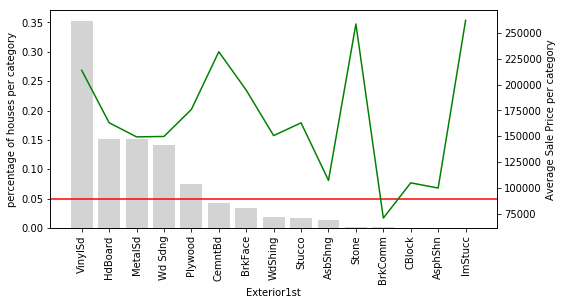

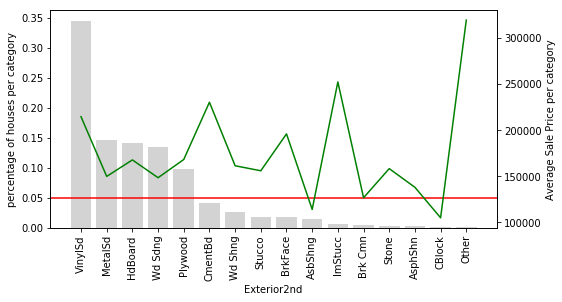

In [122]:
# let's plot the remaining categorical variables

for col in selected_list:
    
    # we plotted this variable already
    if col !='Neighborhood':
        
        # re using the functions I created
        temp_df = calculate_mean_target_per_category(df3, col)
        plot_categories(temp_df, col)

Let's look at variable Exterior2nd: Most of the categories in Exterior2nd are present in less than 5% of houses. In addition, the "SalePrice" varies a lot across those rare categories. The mean value of SalePrice goes up and down over the infrequent categories. In fact, it looks quite noisy. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. We could be under or over-estimating their impact due to the fact that we have information for few houses.

**Note:** This plot would bring more value, if we plotted the errors of the mean SalePrice. It would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and add the standard deviation to the plot?

### 5.7.Group rare labels under a new label

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. See below.

In [123]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [124]:
# group rare labels in Neighborhood

df3['Neighborhood_grouped'] = group_rare_labels(df3, 'Neighborhood')

df3[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


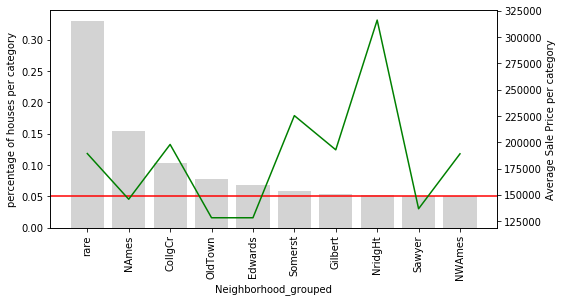

In [125]:
# let's plot Neighborhood with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(df3, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the SalePrice.

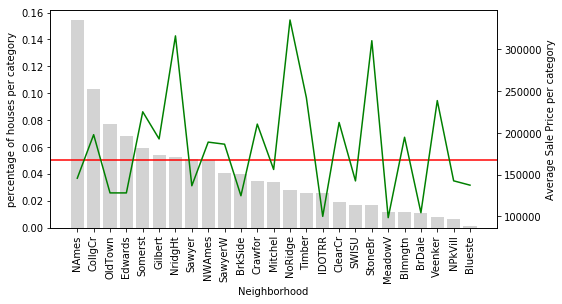

In [126]:
# let's plot the original Neighborhood for comparison
temp_df = calculate_mean_target_per_category(df3, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average SalePrice for all the infrequent labels.

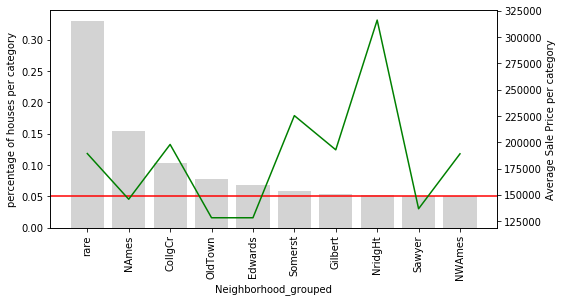

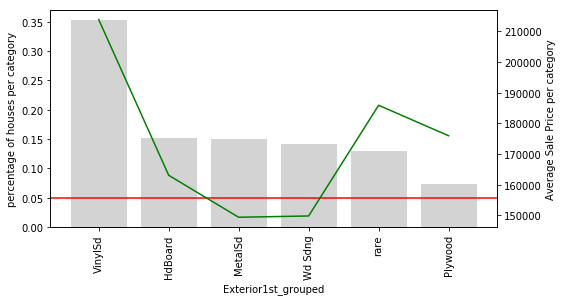

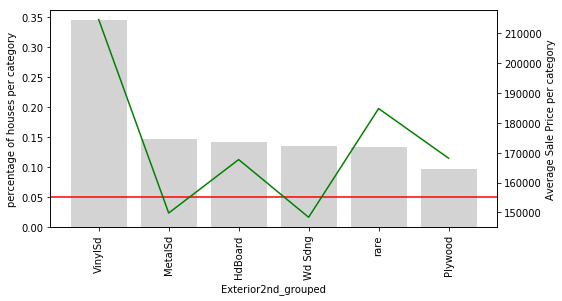

In [127]:
# let's group and plot the remaining categorical variables

for col in selected_list[1:]:
        
    # re using the functions I created
    df3[col+'_grouped'] = group_rare_labels(df3, col)
    temp_df = calculate_mean_target_per_category(df3, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Here is something interesting: In the variable Exterior1st, look at how all the houses with rare values are on average more expensive than the rest, except for those with VinySd.

The same is true for Exterior2nd. The rare categories seem to have had something in common.

**Note:** Ideally, we would also like to have the standard deviation / inter-quantile range for the SalePrice, to get an idea of how variable the house price is for each category.

------------------------------------------------------------------------------

# 6. Feature Scaling

### 6.1. Standarisation

Standarisation is also used to bring all the variables to a similar scale. Standarisation means centering the variable at zero, and standarising the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) /  std

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [ ]:
# standarisation: we use the StandardScaler from sklearn

scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

As expected, the mean of each variable is now around zero and the standard deviation is set to 1. Thus, all the variable  values lie within the same range.

However, the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers. We observed in previous lectures that the variable Fare has a few extreme outliers, that is, people that paid extraordinarily high Fares. Those observations would drive the value of the maximum value far away from the unit variance (a value of 9.9 in this case).

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.23351124, -1.92873085, -1.62395046, -1.31917007, -1.01438968,
        -0.70960929, -0.4048289 , -0.10004851,  0.20473188,  0.50951227,
         0.81429266,  1.11907305,  1.42385344,  1.72863383,  2.03341422,
         2.33819461,  2.642975  ,  2.94775539,  3.25253577,  3.55731616,
         3.86209655]),
 <a list of 20 Patch objects>)

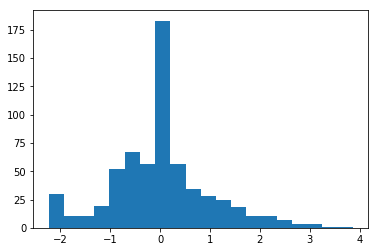

In [10]:
# let's look at the distribution of the transformed variable Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([-0.67314402, -0.14189064,  0.38936273,  0.9206161 ,  1.45186948,
         1.98312285,  2.51437622,  3.04562959,  3.57688297,  4.10813634,
         4.63938971,  5.17064309,  5.70189646,  6.23314983,  6.76440321,
         7.29565658,  7.82690995,  8.35816333,  8.8894167 ,  9.42067007,
         9.95192344]),
 <a list of 20 Patch objects>)

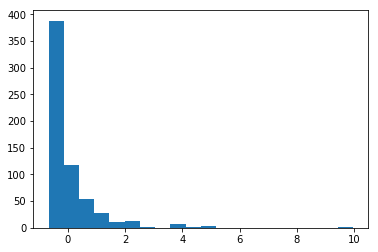

In [11]:
# let's look at the distribution of the transformed variable Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the standarisation of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

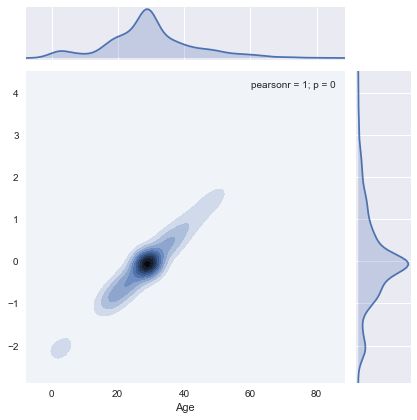

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

The transformed variable has a good correlation with the original one.

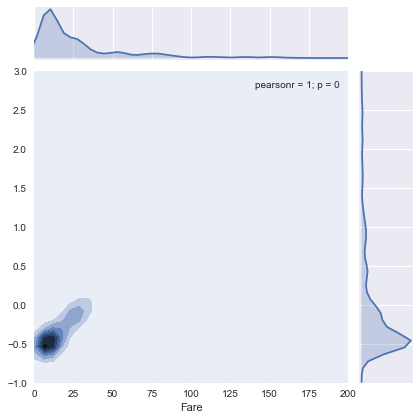

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

The values are concentrated on the lower left side of the plot, because Fare is highly skewed: the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values as shown in the left figure above.

Other scaling methods account for the presence of outliers. I will discuss those in the next lectures.

### 6.2. Scaling to minimum and maximum values

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the range:

X_scaled = (X - X.min / (X.max - X.min)

The minimum maximum scaling method has the same disadvantage that standarisation, which is that it compresses the observations in the narrow range if the variable is very skewed or has outliers. 

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Let's demonstrate the MinMaxScaling method using scikit-learn.


In [7]:
# this scales the features between 0 and 1.

scaler = MinMaxScaler() # create an instance
X_train_scaled = scaler.fit_transform(X_train) #  fit  the scaler to the train set and then transform it
X_test_scaled = scaler.transform(X_test) # transform (scale) the test set

In [8]:
#let's have a look at the scaled training dataset: mean and standard deviation

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [ 0.64365971  0.36641321  0.06335433]
std (Pclass, Age and Fare):  [ 0.41999093  0.16405255  0.09411705]


After MinMaxScaling, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [ 0.  0.  0.]
Max values (Pclass, Age and Fare):  [ 1.  1.  1.]


But the minimum and maximum values are standarised across variables, different from what occurs with standarisation.

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

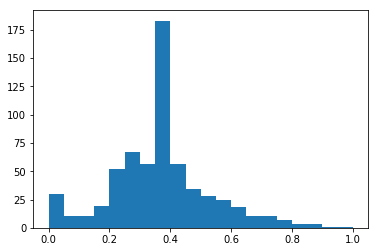

In [10]:
# let's look at the distributions of the transformed variables: Age

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

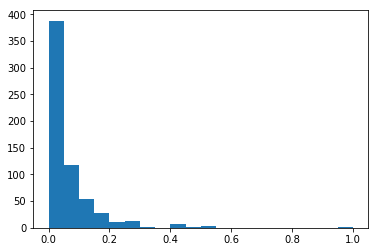

In [11]:
# let's look at the distributions of the transformed variables: Fare

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot. In fact, we can see that the MinMaxScaling of Fare, shrinks the majority of the observations towards the lowest values.

In [12]:
import seaborn as sns

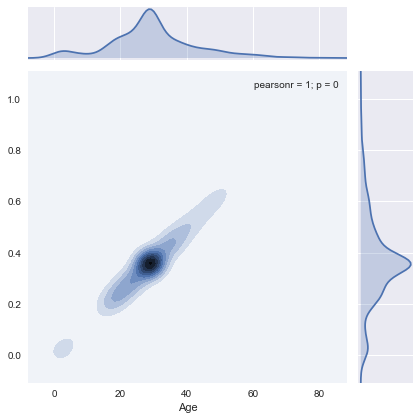

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

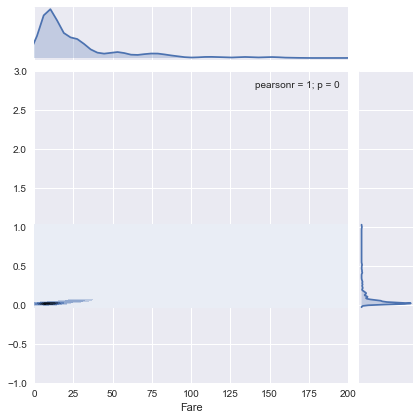

In [14]:
# let's look at how transformed Fare looks like compared to the original variable


sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see from the above plot, MinMaxScaler is very sensitive to the presence of outliers. It compressed all inliers in the narrow range [0, 0.01] limiting the spread of the variable, and therefore, very likely it would affect the predictive power of this feature.

### 6.3. Scaling to median and quantiles

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


Let's demonstrate the Median and Quantile scaling method using scikit-learn. The function of sklearn to perform this procedure is the RobustScaler

### 6.4. Robust Scaler

In [7]:
# robust scaler

scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [8]:
#let's have a look at the scaled training dataset

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-0.47512039  0.0567354   0.7440926 ]
std (Pclass, Age and Fare):  [ 0.55998791  1.00109914  2.05514812]


As you can see, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.33333333 -2.17923077 -0.63931806]
Max values (Pclass, Age and Fare):  [  0.           3.92307692  21.19676931]


Neither are the minimum and maximum values set to a certain upper and lower boundaries like in the MinMaxScaler

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.17923077, -1.87411538, -1.569     , -1.26388462, -0.95876923,
        -0.65365385, -0.34853846, -0.04342308,  0.26169231,  0.56680769,
         0.87192308,  1.17703846,  1.48215385,  1.78726923,  2.09238462,
         2.3975    ,  2.70261538,  3.00773077,  3.31284615,  3.61796154,
         3.92307692]),
 <a list of 20 Patch objects>)

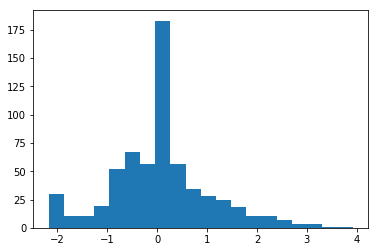

In [10]:
# let's look at the distribution of Age transformed

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ -0.63931806,   0.45248631,   1.54429068,   2.63609505,
          3.72789941,   4.81970378,   5.91150815,   7.00331252,
          8.09511689,   9.18692126,  10.27872563,  11.37052999,
         12.46233436,  13.55413873,  14.6459431 ,  15.73774747,
         16.82955184,  17.92135621,  19.01316058,  20.10496494,  21.19676931]),
 <a list of 20 Patch objects>)

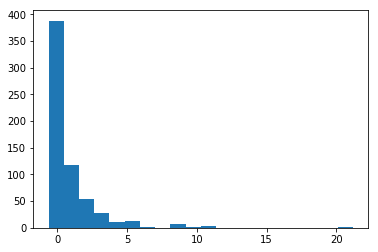

In [11]:
# let's look at the distribution of Fare transformed

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot.

In [12]:
import seaborn as sns

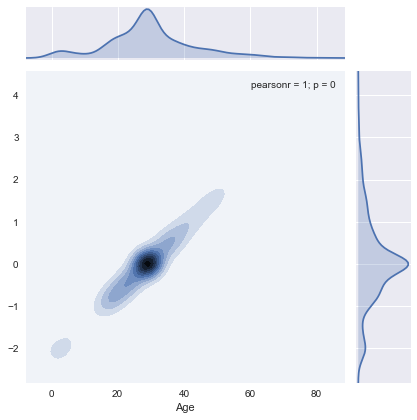

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

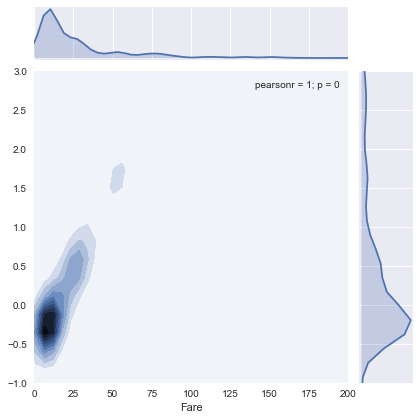

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see, The robust scaler does a better job at preserving the spread of the variable after transformation for skewed variables like Fare (compare with the standard scaler or the MinMaxScaler)

### Conclusions

Typically, at the time of setting the features within a similar scale for Machine Learning, standarisation is the normalisation method of choice. And this is done without taking into account the distribution of the variable.

However, we have seen in the past 3 lectures that the different normalisation methods have different advantages and disadvantages, and when the distribution of the variable is skewed, perhaps it is better to scale using the mean and quantiles method, which is more robust to the presence of outliers.

------------------------------------------------------------------------------

# 7. Engineering Temporal Vars

In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
# let's load the Lending Club dataset with a few selected columns
# just a few rows to speed things up

use_cols = ['issue_d', 'last_pymnt_d']
data = pd.read_csv('loan.csv', usecols=use_cols, nrows=10000)
data.head()

,issue_d,last_pymnt_d
0,Dec-2011,Jan-2015
1,Dec-2011,Apr-2013
2,Dec-2011,Jun-2014
3,Dec-2011,Jan-2015
4,Dec-2011,Jan-2016


In [3]:
# now let's parse the dates, currently coded as strings, into datetime format

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2011,2011-12-01,Jan-2015,2015-01-01
1,Dec-2011,2011-12-01,Apr-2013,2013-04-01
2,Dec-2011,2011-12-01,Jun-2014,2014-06-01
3,Dec-2011,2011-12-01,Jan-2015,2015-01-01
4,Dec-2011,2011-12-01,Jan-2016,2016-01-01


In [4]:
# Extracting Month from date

data['issue_dt_month'] = data['issue_dt'].dt.month

data[['issue_dt', 'issue_dt_month']].head()

,issue_dt,issue_dt_month
0,2011-12-01,12
1,2011-12-01,12
2,2011-12-01,12
3,2011-12-01,12
4,2011-12-01,12


In [5]:
data[['issue_dt', 'issue_dt_month']].tail()

,issue_dt,issue_dt_month
9995,2011-08-01,8
9996,2011-08-01,8
9997,2011-08-01,8
9998,2011-08-01,8
9999,2011-08-01,8


In [6]:
# Extract quarter from date variable

data['issue_dt_quarter'] = data['issue_dt'].dt.quarter

data[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2011-12-01,4
1,2011-12-01,4
2,2011-12-01,4
3,2011-12-01,4
4,2011-12-01,4


In [7]:
data[['issue_dt', 'issue_dt_quarter']].tail()

,issue_dt,issue_dt_quarter
9995,2011-08-01,3
9996,2011-08-01,3
9997,2011-08-01,3
9998,2011-08-01,3
9999,2011-08-01,3


In [8]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]),1,2)
data.head()

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt,issue_dt_month,issue_dt_quarter,issue_dt_semester
0,Dec-2011,Jan-2015,2011-12-01,2015-01-01,12,4,2
1,Dec-2011,Apr-2013,2011-12-01,2013-04-01,12,4,2
2,Dec-2011,Jun-2014,2011-12-01,2014-06-01,12,4,2
3,Dec-2011,Jan-2015,2011-12-01,2015-01-01,12,4,2
4,Dec-2011,Jan-2016,2011-12-01,2016-01-01,12,4,2


In [9]:
# day - numeric from 1-31

data['issue_dt_day'] = data['issue_dt'].dt.day

data[['issue_dt', 'issue_dt_day']].head()

,issue_dt,issue_dt_day
0,2011-12-01,1
1,2011-12-01,1
2,2011-12-01,1
3,2011-12-01,1
4,2011-12-01,1


In [10]:
# day of the week - from 0 to 6

data['issue_dt_dayofweek'] = data['issue_dt'].dt.dayofweek

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,3
1,2011-12-01,3
2,2011-12-01,3
3,2011-12-01,3
4,2011-12-01,3


In [11]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2011-08-01,0
9996,2011-08-01,0
9997,2011-08-01,0
9998,2011-08-01,0
9999,2011-08-01,0


In [12]:
# day of the week - name

data['issue_dt_dayofweek'] = data['issue_dt'].dt.weekday_name

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2011-12-01,Thursday
1,2011-12-01,Thursday
2,2011-12-01,Thursday
3,2011-12-01,Thursday
4,2011-12-01,Thursday


In [13]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2011-08-01,Monday
9996,2011-08-01,Monday
9997,2011-08-01,Monday
9998,2011-08-01,Monday
9999,2011-08-01,Monday


In [14]:
# was the application done on the weekend?

data['issue_dt_is_weekend'] = np.where(data['issue_dt_dayofweek'].isin(['Sunday', 'Saturday']), 1,0)
data[['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
0,2011-12-01,Thursday,0
1,2011-12-01,Thursday,0
2,2011-12-01,Thursday,0
3,2011-12-01,Thursday,0
4,2011-12-01,Thursday,0


In [15]:
data[data.issue_dt_is_weekend==1][['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
4269,2011-10-01,Saturday,1
4280,2011-10-01,Saturday,1
4287,2011-10-01,Saturday,1
4290,2011-10-01,Saturday,1
4293,2011-10-01,Saturday,1


In [16]:
# extract year 

data['issue_dt_year'] = data['issue_dt'].dt.year

data[['issue_dt', 'issue_dt_year']].head()

,issue_dt,issue_dt_year
0,2011-12-01,2011
1,2011-12-01,2011
2,2011-12-01,2011
3,2011-12-01,2011
4,2011-12-01,2011


In [17]:
# perhaps more interestingly, extract the date difference between 2 dates

data['issue_dt'] - data['last_pymnt_dt']


0      -1127 days
1       -487 days
2       -913 days
3      -1127 days
4      -1492 days
5      -1127 days
6      -1492 days
7      -1127 days
8       -122 days
9       -336 days
10      -548 days
11      -640 days
12      -213 days
13     -1127 days
14      -670 days
15     -1127 days
16     -1127 days
17      -517 days
18     -1158 days
19      -213 days
20     -1339 days
21      -640 days
22     -1127 days
23      -670 days
24      -305 days
25      -275 days
26            NaT
27      -366 days
28      -487 days
29     -1096 days
          ...    
9970   -1096 days
9971   -1188 days
9972    -519 days
9973    -274 days
9974   -1096 days
9975   -1004 days
9976    -274 days
9977   -1096 days
9978   -1096 days
9979    -762 days
9980   -1492 days
9981    -397 days
9982   -1004 days
9983     -31 days
9984    -974 days
9985   -1096 days
9986   -1096 days
9987    -731 days
9988    -853 days
9989    -915 days
9990    -244 days
9991   -1096 days
9992   -1096 days
9993    -458 days
9994   -16

In [18]:
# same as above capturing just the time difference
(data['last_pymnt_dt']-data['issue_dt']).dt.days.head()

0    1127.0
1     487.0
2     913.0
3    1127.0
4    1492.0
dtype: float64

In [19]:
# or the time difference to today, or any other day of reference

(datetime.datetime.today() - data['issue_dt']).head()

0   2215 days 17:19:22.155930
1   2215 days 17:19:22.155930
2   2215 days 17:19:22.155930
3   2215 days 17:19:22.155930
4   2215 days 17:19:22.155930
Name: issue_dt, dtype: timedelta64[ns]

In [20]:
(datetime.datetime.today() - data['issue_dt']).tail()

9995   2337 days 17:19:22.173943
9996   2337 days 17:19:22.173943
9997   2337 days 17:19:22.173943
9998   2337 days 17:19:22.173943
9999   2337 days 17:19:22.173943
Name: issue_dt, dtype: timedelta64[ns]

**Similarly, if this variable had time as well, we could calculate, at what time the application was done in hrs for example, and then segregate it in: morning-afternoon-evening.**

Very common date differences used in the industry include "age" using "date of birth" and the "time of application" (i.e., how old was the applicant when they applied for a loan). Other examples include how long the applicant has lived at th declared address.

### Note

Once preprocessed in these ways, the variables are ready to be used in machine learning models following typical preprocessing of numerical or categorical variables, as shown in previous and future sections in this course.

-------------------------------------------------------------------------------

# 8. Text Vars

### address

 Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [454]:
cat_df['zip_code'] = cat_df['address'].apply(lambda address:address[-5:])

-------------------------------------------------------------------------------

# 9. Feature Derivation/ Generation

### 9.1. Extract a part of data

In [618]:
def get_title(passenger):
    # extracts the title from the name variable
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
df['Title'] = df['Name'].apply(get_title)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [619]:
# drop the original variable
df.drop(labels='Name', inplace=True, axis=1)

### 9.2. Aggregative features

In [ ]:
# create a variable indicating family size (including the passenger)
# sums siblings and parents
df['Family_size'] = df['SibSp']+df['Parch']+1

The new variable Family size is discrete, because it is the sum of 2 discrete variables. It takes a finite number of values, and large families were rare on the Titanic. In fact, families larger than 7 people were rare, so I will **cap family size at 7**.

### 9.3. Derived features

In [621]:
# variable indicating if passenger was a mother
df['is_mother'] = np.where((df.Sex =='female')&(df.Parch>=1)&(df.Age>18),1,0)
df[['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
0,male,0,22.0,0
1,female,0,38.0,0
2,female,0,26.0,0
3,female,0,35.0,0
4,male,0,35.0,0


In [622]:
df.loc[df.is_mother==1, ['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
8,female,2,27.0,1
25,female,5,38.0,1
88,female,2,23.0,1
98,female,1,34.0,1
136,female,2,19.0,1


In [623]:
print('there were {} mothers in the Titanic'.format(df.is_mother.sum()))

there were 64 mothers in the Titanic


# 10. Engineer labels of categorical variables

### 10.1. One Hot Encoding

One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

Each one of the boolean variables are also known as **dummy variables** or binary variables.

For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise. 

#### Advantages

- Straightforward to implement
- Makes no assumption
- Keeps all the information of the categorical variable

#### Disadvantages

- Does not add any information that may make the variable more predictive
- If the variable has loads of categories, then OHE increases the feature space dramatically

In [2]:
# one hot encoding

pd.get_dummies(data).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [3]:
# for better visualisation
pd.concat([data, pd.get_dummies(data)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


As you may have noticed, we only need 1 of the 2 dummy variables to represent the original categorical variable Sex. Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.

Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable. 

To extend this concept, to encode  categorical variable with k labels, we need k-1 dummy variables.

How can we get this using pandas?

In [4]:
# obtaining k-1 labels
pd.get_dummies(data, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [5]:
# Let's now look at an example with more than 2 labels

data=pd.read_csv('titanic.csv', usecols=['Embarked'])
data.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [6]:
# check the number of different labels
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
# get whole set of dummy variables

pd.get_dummies(data).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
# get k-1 dummy variables

pd.get_dummies(data, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [9]:
# we can also add an additional dummy variable to indicate whether there was missing data

pd.get_dummies(data, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [10]:
# by summing the number of 1s per boolean variable over the rows of the dataset, we get to know how
# many observations we have for each variable (i.e., each category)

pd.get_dummies(data, drop_first=True, dummy_na=True).sum(axis=0)

Embarked_Q       77
Embarked_S      644
Embarked_nan      2
dtype: int64

### Notes

Both pandas and sklearn will provide a whole set of dummy variables from a categorical variable. This is, instead of returning k-1 binary variables, they will return k, with the option in pandas of dropping the first binary variable and obtain k-1.

### When should you use k and when k-1?

When the original variable is binary, that is, when the original variable has only 2 labels, then you should create **one and only one** binary variable.

When the original variable has more than 2 labels, the following is important:

#### One hot encoding into k-1:
One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that. 

One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.

And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.

#### One hot encoding into k dummy variables

However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.

Finally, if you are planning to do feature selection, you will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.

Let's train a model on data with categorical variables re-encoded with One Hot Encoding.

In [13]:
# let's make a copy of the dataset, in which we encode the categorical variables using OHE

data_OHE = pd.concat([data[['Pclass', 'Age', 'SibSp','Parch', 'Survived']], # numerical variables 
                      pd.get_dummies(data.Sex, drop_first=True),   # binary categorical variable
                      pd.get_dummies(data.Embarked, drop_first=True)],  # k categories in categorical
                    axis=1)

data_OHE.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


### 10.2. One Hot encoding of top variables

#### Advantages

- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space (number of columns in the dataset)

#### Disadvantages

- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels


Because it is not unusual that categorical variables have a few dominating categories and the remaining labels add mostly noise, this is a quite simple and straightforward approach that may be useful on many occasions.

It is worth noting that the top 10 variables is a totally arbitrary number. You could also choose the top 5, or top 20.

This modelling was more than enough for the team to win the KDD 2009 cup. They did do some other powerful feature engineering as we will see in following lectures, that improved the performance of the variables dramatically.

In [1]:
import pandas as pd
import numpy as np

# let's load the mercedes benz dataset for demonstration, only the categorical variables

data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [2]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


In [3]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(data, drop_first=True).shape

(4209, 117)

We can see that from just 6 initial categorical variables, we end up with 117 new variables. 

These numbers are still not huge, and in practice we could work with them relatively easily. However, in business datasets and also other Kaggle or KDD datasets, it is not unusual to find several categorical variables with multiple labels. And if we use one hot encoding on them, we will end up with datasets with thousands of columns.

What can we do instead?

In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), the authors limit one hot encoding to the 10 most frequent labels of the variable. This means that they would make one binary variable for each of the 10 most frequent labels only. This is equivalent to grouping all the other labels under a new category, that in this case will be dropped. Thus, the 10 new dummy variables indicate if one of the 10 most frequent labels is present (1) or not (0) for a particular observation.

How can we do that in python?

In [4]:
# let's find the top 10 most frequent categories for the variable X2

data.X2.value_counts().sort_values(ascending=False).head(10)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
Name: X2, dtype: int64

In [5]:
# let's make a list with the most frequent categories of the variable

top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [6]:
# and now we make the 10 binary variables

for label in top_10:
    data[label] = np.where(data['X2']==label, 1, 0)

data[['X2']+top_10].head(10)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [7]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)

# read the data again
data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

# encode X2 into the 10 most frequent categories
one_hot_top_x(data, 'X2', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [8]:
# find the 10 most frequent categories for X1
top_10 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

# now create the 10 most frequent dummy variables for X1
one_hot_top_x(data, 'X1', top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 10.3. Ordinal numbering encoding

**Ordinal categorical variables**

Categorical variable which categories can be meaningfully ordered are called ordinal. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week can be ordinal with Monday = 1, and Sunday = 7.
- Educational level, with the categories: Elementary school,  High school, College graduate, PhD ranked from 1 to 4.

When the categorical variable is ordinal, the most straightforward approach is to replace the labels by some ordinal number.

### Advantages

- Keeps the semantical information of the variable (human readable content)
- Straightforward

### Disadvantage

- Does not add machine learning valuable information

In [2]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 30 days difference from today
# and then transform it into a datafame

base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 30)]
df = pd.DataFrame(date_list)
df.columns = ['day']
df

,day
0,2017-11-24 23:37:17.497960
1,2017-11-23 23:37:17.497960
2,2017-11-22 23:37:17.497960
3,2017-11-21 23:37:17.497960
4,2017-11-20 23:37:17.497960
5,2017-11-19 23:37:17.497960
6,2017-11-18 23:37:17.497960
7,2017-11-17 23:37:17.497960
8,2017-11-16 23:37:17.497960
9,2017-11-15 23:37:17.497960


In [3]:
# extract the week day name

df['day_of_week'] = df['day'].dt.weekday_name
df.head()

,day,day_of_week
0,2017-11-24 23:37:17.497960,Friday
1,2017-11-23 23:37:17.497960,Thursday
2,2017-11-22 23:37:17.497960,Wednesday
3,2017-11-21 23:37:17.497960,Tuesday
4,2017-11-20 23:37:17.497960,Monday


In [4]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(10)

,day,day_of_week,day_ordinal
0,2017-11-24 23:37:17.497960,Friday,5
1,2017-11-23 23:37:17.497960,Thursday,4
2,2017-11-22 23:37:17.497960,Wednesday,3
3,2017-11-21 23:37:17.497960,Tuesday,2
4,2017-11-20 23:37:17.497960,Monday,1
5,2017-11-19 23:37:17.497960,Sunday,7
6,2017-11-18 23:37:17.497960,Saturday,6
7,2017-11-17 23:37:17.497960,Friday,5
8,2017-11-16 23:37:17.497960,Thursday,4
9,2017-11-15 23:37:17.497960,Wednesday,3


We can now use the variable day_ordinal in sklearn to build machine learning models.

### 10.4. Count or frequency encoding

Another way to refer to variables that have a multitude of categories, is to call them variables with **high cardinality**.

We observed in the previous lecture, that if a categorical variable contains multiple labels, then by re-encoding them using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

There is not any rationale behind this transformation, other than its simplicity.

### Advantages

- Simple
- Does not expand the feature space

### Disadvantages

-  If 2 labels appear the same amount of times in the dataset, that is, contain the same number of observations, they will be merged: may loose valuable information
- Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# let's open the mercedes benz dataset for demonstration

data = pd.read_csv('mercedesbenz.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'])
data.head()

,y,X1,X2,X3,X4,X5,X6
0,130.81,v,at,a,d,u,j
1,88.53,t,av,e,d,y,l
2,76.26,w,n,c,d,x,j
3,80.62,t,n,f,d,x,l
4,78.02,v,n,f,d,h,d


In [2]:
# let's have a look at how many labels

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


### Important

When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) **over the training set**, and then use those numbers to replace the labels in the test set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [4]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

X_train.X2.value_counts().to_dict()

{'a': 34,
 'aa': 1,
 'ac': 10,
 'ae': 342,
 'af': 1,
 'ag': 15,
 'ah': 3,
 'ai': 289,
 'ak': 188,
 'al': 3,
 'am': 1,
 'an': 3,
 'ao': 10,
 'ap': 5,
 'aq': 46,
 'as': 1155,
 'at': 5,
 'au': 3,
 'av': 2,
 'aw': 2,
 'ay': 40,
 'b': 12,
 'c': 1,
 'd': 12,
 'e': 61,
 'f': 59,
 'g': 10,
 'h': 4,
 'i': 15,
 'k': 16,
 'l': 1,
 'm': 284,
 'n': 97,
 'o': 1,
 'p': 1,
 'q': 3,
 'r': 101,
 's': 63,
 't': 17,
 'x': 8,
 'y': 8,
 'z': 14}

In [5]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,ai,c,d,q,g
3014,b,m,c,d,q,i
3368,o,f,f,d,s,l
2772,aa,as,d,d,p,j
3383,v,e,c,d,s,g


In [6]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


Where in the original dataset, for the observation 1 in the variable 2 before it was 'ai', now it was replaced by the count 289. And so on for the rest of the categories (compare outputs 5 and 6).

### Note

I want you to keep in mind something important:

If a category is present in the test set, that was not present in the train set, this method will generate missing data in the test set. This is why it is extremely important to handle rare categories, as we say in section 6 of this course.

Then we can combine rare label replacement plus categorical encoding with counts like this: we may choose to replace the 10 most frequent labels by their count, and then group all the other labels under one label (for example "Rare"), and replace "Rare" by its count, to account for what I just mentioned.

In coming sections I will explain more methods of categorical encoding. I want you to keep in mind that There is no rule of thumb to indicate which method you should use to encode categorical variables. It is mostly up to what makes sense for the data, and it also depends on what you are trying to achieve. In general, for data competitions, we value more model predictive power, whereas in business scenarios we want to capture and understand the information, and generally, we want to transform variables in a way that it makes 'Business sense'. Some of your common sense and a lot of conversation with the people that understand the data well will be required to encode categorical labels.


### 10.5. Target guided ordinal encoding 

In the previous lectures in this section on how to engineer the labels of categorical variables, we learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Create a monotonic relationship between the variable and the target
- Do not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".

### Ordering  labels according to the target

Ordering the labels according to the target means assigning a number to the label, but this numbering, this ordering, is informed by the mean of the target within the label.

Briefly, we calculate the mean of the target for each label/category, then we order the labels according to these mean from smallest to biggest, and we number them accordingly.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique()) # check number of different labels in Cabin

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels again, we have much less categories in Cabin now

data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The ordering of the labels should be done considering the target ONLY on the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Cabin', 'Survived']], data.Survived, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# now we order the labels according to the mean target value

X_train.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.303609
A    0.428571
G    0.500000
C    0.571429
F    0.666667
D    0.692308
E    0.740741
B    0.774194
Name: Survived, dtype: float64

In [9]:
# now we generate an ordered list with the labels

X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'D', 'E', 'B'], dtype='object', name='Cabin')

In [10]:
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [11]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'A': 2, 'B': 8, 'C': 4, 'D': 6, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

This method assigned the number 0 to T, the category with the lowest target mean, and 8 to B, the category with the highest target mean.

In [12]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

X_train['Cabin_ordered'] = X_train.Cabin.map(ordinal_label)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordinal_label)

In [13]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,7
52,D,1,6
386,M,0,1
124,D,0,6
578,M,0,1


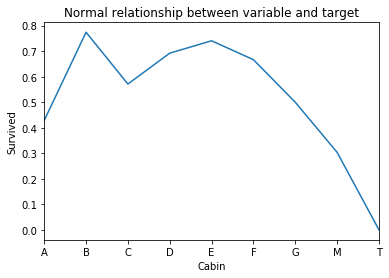

In [14]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

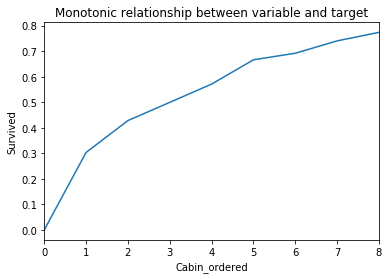

In [15]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

There is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand, as we explained in previous sections.

### 10.6. Mean encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, we learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Creates a monotonic relationship between the variable and the target
- Does not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".


### Replace labels by the Risk Factor

Replacing labels by the risk factor means essentially replacing the label by the mean of the target for that label. 

I have only seen this procedure applied in classifications scenarios, where the target can take just the values of 1 or 0. However, in principle, I don't see why this shouldn't be possible as well when the target is continuous. Just be mindful of over-fitting.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique()) # check number of different labels in Cabin

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The risk factor should be calculated per label considering ONLY on the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# let's calculate the target frequency for each label

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.77419354838709675,
 'C': 0.5714285714285714,
 'D': 0.69230769230769229,
 'E': 0.7407407407407407,
 'F': 0.66666666666666663,
 'G': 0.5,
 'M': 0.30360934182590232,
 'T': 0.0}

In [10]:
# replace the labels with the 'risk' (target frequency)
# note that we calculated the frequencies based on the training set only

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [11]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


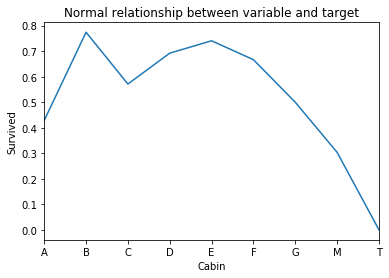

In [12]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

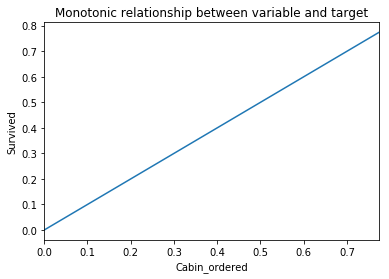

In [13]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

Here the relationship lies perfectly on a diagonal line, because this is how we replaced the categories. 

### 10.7. Probability ratio encoding

In the previous lectures in this section on how to engineer the labels of categorical variables, you learnt how to convert a label into a number, by using one hot encoding or replacing by frequency or counts. These methods are simple, make no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the risk (of the target)
- Replacing the labels by the joint probability of the target being 1 or 0
- Weight of evidence.

### Monotonicity

All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In general:

### Advantages

- Capture information within the label, therefore rendering more predictive features
- Creates a monotonic relationship between the variable and the target
- Does not expand the feature space

### Disadvantage

- Prone to cause over-fitting


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".


### Replace labels by joint probability of the target being 1 or 0

For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the labels by that ratio.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The calculation of the probability ratios to replace the labels should be done considering ONLY on the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# let's calculate the probability of Survived (target=1)
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# let's make a dataframe with the above

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [10]:
# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [11]:
#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000000,1.000000,0.000000


In [12]:
# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

{'A': 0.75,
 'B': 3.4285714285714279,
 'C': 1.3333333333333333,
 'D': 2.25,
 'E': 2.8571428571428563,
 'F': 1.9999999999999998,
 'G': 1.0,
 'M': 0.4359756097560975,
 'T': 0.0}

In [13]:
ordered_labels = prob_df['ratio'].to_dict()

In [14]:
# replace the labels with the ratios

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [15]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,2.857143
52,D,1,2.250000
386,M,0,0.435976
124,D,0,2.250000
578,M,0,0.435976


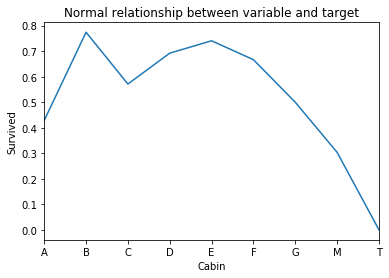

In [16]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

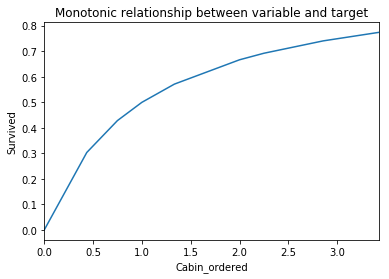

In [17]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

# check the labels
data.Cabin.unique()

### Important

The calculation of the probability ratios to replace the labels should be done considering ONLY on the training set, and then expanded it to the test set.
See below.

# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

# let's calculate the probability of Survived (target=1)
X_train.groupby(['Cabin'])['Survived'].mean()

# let's make a dataframe with the above

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

ordered_labels = prob_df['ratio'].to_dict()

# replace the labels with the ratios

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

# check the results

X_train.head()

# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.



### 10.8. Weight of evidence

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

It is computed from the basic odds ratio: ln( (Proportion of Good Credit Outcomes) / (Proportion of Bad Credit Outcomes))

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It establishes a monotonic relationship to the dependent variable.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables, can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has three drawbacks:

- May incur in loss of information (variation) due to binning to few categories (we will discuss this further in the discretisation section)
- It does not take into account correlation between independent variables
- Prone to cause over-fitting

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [5]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Important

The calculation of the WoE to replace the labels should be done considering the ONLY the training set, and then expanded it to the test set.
See below.

In [7]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [8]:
# now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [9]:
# let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [10]:
# and now the probability of target = 0 
# and we add it to the dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [11]:
# since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [12]:
# now we calculate the WoE

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [13]:
# and we create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.2321436812926321,
 'C': 0.28768207245178085,
 'D': 0.81093021621632877,
 'E': 1.0498221244986774,
 'F': 0.69314718055994518,
 'G': 0.0,
 'M': -0.83016897812423662,
 'T': -11.512925464970229}

In [14]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()

In [15]:
# replace the labels with the WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [16]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


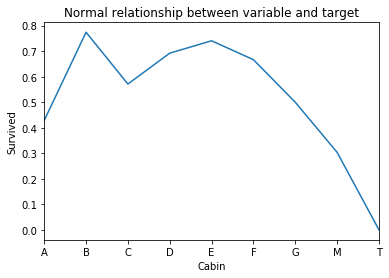

In [17]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

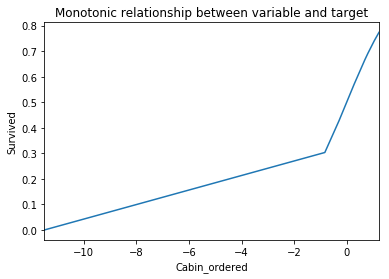

In [18]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

### Note

Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.

# Other

### Get a sample from the whole set

In [2]:
# let's replace the NaN with the fictitious codes described below:
# 'A': couldn't identify the person
# 'B': no relevant data
# 'C': person seems not to have any account open
# this is exactly what we did in section 2 of this course for the lecture on mixed types of variables

# select which observations we will replace with each code
indeces_b = data[data.open_il_24m.isnull()].sample(100000, random_state=44).index
indeces_c = data[data.open_il_24m.isnull()].sample(300000, random_state=42).index

# replace NA with the fictitious code
data.open_il_24m.fillna('A', inplace=True)
data.loc[indeces_b, 'open_il_24m']='B'
data.loc[indeces_c, 'open_il_24m']='C'

### Apply function

In [16]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [17]:
X_train['mort_acc'] = X_train.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
X_test['mort_acc'] = X_test.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
def find_uncorrelated_vars(cancer_df, selected_vars, threshold):

    corrmat = cancer_df[selected_vars].corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
    corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
    corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
    
    correlated_groups = corrmat[corrmat['corr'] > threshold]
    
    selected_vars = []
    remaining_vars = correlated_groups.feature1.unique()

    while(len(remaining_vars) > 0):
        feature = remaining_vars[0]
        correlated_block = correlated_groups[correlated_groups.feature1 == feature]
        min_ind = correlated_block[['MissingF2']].idxmin() 
        sel_var = correlated_block.feature2[min_ind].values[0]
        removed_vars = [var for var in list(correlated_block.feature2.values)]
        remaining_vars = [var for var in remaining_vars if var not in removed_vars]
        if sel_var not in selected_vars:
            selected_vars = selected_vars + [sel_var]   
    
    return selected_vars

In [ ]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [ ]:
def MissingPercentage(x):
    return df[x].isnull().sum()/len(df)

# 4. Convert to right format 

### 4.1. Convert year to month

#### V6 (Infertility Period), V7 (Treatment Period)

In [14]:
df[['V6','V7']].head(5)

,V6,V7
0,21_7,5_8
1,1_2,10_0
2,2_10,2_6
3,1_0,0_11
4,0_6,0_5


In [15]:
def ConvertYearToMonth(val):
    pos = val.find('_')
    year = val[0:pos]
    month = val[pos+1:]
    if ((len(year) > 0) & (len(month) > 0)):
        val = int(year) * 12 + int(month)
        
    return val

In [16]:
df['V6'] = df['V6'].apply(ConvertYearToMonth)
df['V6'] = df['V6'].replace('_',np.nan)

df['V7'] = df['V7'].apply(ConvertYearToMonth)
df['V7'] = df['V7'].replace('_',np.nan)

df[['V6','V7']].head(5)

,V6,V7
0,259.0,68.0
1,14.0,120.0
2,34.0,30.0
3,12.0,11.0
4,6.0,5.0


### 4.2. Converting day from str to datetime type

#### V15 (birthday), V104, V254, V404, V554, V704 (Cycle start date  (menstruation start date))

In [17]:
import datetime

def ConvertToDateTime(bd):
    birthday = bd.replace('_','-')
    if (birthday == '--'):
        birthday = np.nan
        
    return birthday

In [18]:
df['V15'] = df['V15'].apply(ConvertToDateTime)
df['V15'] = pd.to_datetime(df['V15'])

df['V104'] = df['V104'].astype(str)
df['V104'] = df['V104'].apply(ConvertToDateTime)
df['V104'] = pd.to_datetime(df['V104'], errors='coerce')

df['V254'] = df['V254'].astype(str)
df['V254'] = df['V254'].apply(ConvertToDateTime)
df['V254'] = pd.to_datetime(df['V254'], errors='coerce')

df['V404'] = df['V404'].astype(str)
df['V404'] = df['V404'].apply(ConvertToDateTime)
df['V404'] = pd.to_datetime(df['V404'], errors='coerce')

df['V554'] = df['V554'].astype(str)
df['V554'] = df['V554'].apply(ConvertToDateTime)
df['V554'] = pd.to_datetime(df['V554'], errors='coerce')

df['V704'] = df['V704'].astype(str)
df['V704'] = df['V704'].apply(ConvertToDateTime)
df['V704'] = pd.to_datetime(df['V704'], errors='coerce')

### 4.3 Convert categorical to numerical vars

#### Smoking history

In [19]:
df.V24.value_counts()

5年以上～10年未満     635
10年以上～15年未満    540
3年以上～5年未満      295
15年以上～20年未満    262
1年以上～3年未満      253
20年以上～25年未満    100
6ヶ月以下           91
7ヶ月以上～1年未満      61
25年以上           22
Name: V24, dtype: int64

In [20]:
def SmokingHistory(val):
    switcher = {
        '6ヶ月以下': 1,
        '7ヶ月以上～1年未満': 2,
        '1年以上～3年未満': 3,
        '3年以上～5年未満': 4,
        '5年以上～10年未満': 5,
        '10年以上～15年未満': 6,
        '15年以上～20年未満': 7,
        '20年以上～25年未満': 8,
        '25年以上': 9
    }
    
    return switcher.get(val)

In [21]:
df.V24 = df.V24.apply(SmokingHistory)
df.V24.value_counts()

5.0    635
6.0    540
4.0    295
7.0    262
3.0    253
8.0    100
1.0     91
2.0     61
9.0     22
Name: V24, dtype: int64

# 5. Mapping Japanese to English

### 5.1. V4 - TreatmentStatus

In [22]:
df.V4.value_counts()

妊娠によって治療終了（不妊治療によって妊娠した）     4202
現在も治療中                       3328
妊娠によって治療終了（不妊治療による妊娠ではない）     865
治療はお休み中                       778
妊娠以外の理由で治療終了                  454
検査のみで治療はしていない                 243
その他                            55
Name: V4, dtype: int64

In [23]:
def Treatment_JapToEng(val):
    switcher = {
        '妊娠によって治療終了（不妊治療によって妊娠した）': 'Pregnancy by infertility treatment',
        '現在も治療中': 'Still in treatment',
        '妊娠によって治療終了（不妊治療による妊娠ではない）': 'Natural Pregnancy',
        '治療はお休み中': 'Suspending the treatment',
        '妊娠以外の理由で治療終了': 'No Pregnancy end of Treatment',
        '検査のみで治療はしていない ': 'Examination only, no treatment',
        'その他': 'Others'       
    }
    
    return switcher.get(val)

In [24]:
df['TreatmentStatus'] = df.V4.apply(Treatment_JapToEng)
df.TreatmentStatus.value_counts()

Pregnancy by infertility treatment    4202
Still in treatment                    3328
Natural Pregnancy                      865
Suspending the treatment               778
No Pregnancy end of Treatment          454
Others                                  55
Name: TreatmentStatus, dtype: int64

### 5.2. V18 - Drinking

In [25]:
df.V18.value_counts()

全く・ほどんど飲酒しない    4524
月に1～2回          1962
週に1～2回          1304
ほぼ毎日             495
週に3～5回           484
Name: V18, dtype: int64

In [26]:
def Drinking_JapToEng(val):
    switcher = {
        '全く・ほどんど飲酒しない': 'No drinking',
        '月に1～2回': '1-2 times a month',
        '週に1～2回': '1-2 times a week',
        'ほぼ毎日': 'Almost every day',
        '週に3～5回': '3-5 times a week'      
    }
    
    return switcher.get(val)

In [27]:
df['V18'] = df.V18.apply(Drinking_JapToEng)
df.V18.value_counts()

No drinking          4524
1-2 times a month    1962
1-2 times a week     1304
Almost every day      495
3-5 times a week      484
Name: V18, dtype: int64

### 5.3. V19 - Smoking

In [28]:
def Smoking_JapToEng(val):
    switcher = {
        '喫煙していない': 'No smoking',
        '過去に喫煙していたが、現在は喫煙していない': 'Used to smoke in the past',
        '現在も喫煙している': 'Still smoking'    
    }
    
    return switcher.get(val)

In [29]:
df.V19.value_counts()

喫煙していない                  6478
過去に喫煙していたが、現在は喫煙していない    1887
現在も喫煙している                 404
Name: V19, dtype: int64

In [30]:
df['V19'] = df.V19.apply(Smoking_JapToEng)
df.V19.value_counts()

No smoking                   6478
Used to smoke in the past    1887
Still smoking                 404
Name: V19, dtype: int64

### 5.4. V31 - Menstruation Status

In [31]:
df.V31.value_counts()

周期通り                 4083
時々不順になるが、おおむね周期通り    3034
月経不順                 1229
ピルを服薬していたため直近は不明      136
Name: V31, dtype: int64

In [32]:
def MenstruationStatus_JapToEng(val):
    switcher = {
        '周期通り': 'Regular Menstruation',
        '時々不順になるが、おおむね周期通り': 'Sometimes Irregular',
        '月経不順': 'Irregular Menstruation',
        'ピルを服薬していたため直近は不明': 'Taking pills'
    }
    
    return switcher.get(val)

In [33]:
df['V31'] = df.V31.apply(MenstruationStatus_JapToEng)
df.V31.value_counts()

Regular Menstruation      4083
Sometimes Irregular       3034
Irregular Menstruation    1229
Taking pills               136
Name: V31, dtype: int64

### 5.5. V105, V255, V405, V555, V705 (Treatment method)

In [34]:
df.V105.value_counts()

タイミング法             2109
人工授精                884
採卵＋移植（顕微授精含む）       450
移植のみ（顕微授精含む）        354
移植のみ（顕微授精含まない）      239
採卵＋移植（顕微授精含まない）     231
採卵のみ                175
Name: V105, dtype: int64

In [35]:
def TreatmentMethod_JapToEng(val):
    switcher = {
        'タイミング法': 'Timing method',
        '人工授精': 'Artificial insemination',
        '採卵＋移植（顕微授精含む': 'Egg collection + transplantation: including microinsemination',
        '移植のみ（顕微授精含む）': 'Transplant only: including microinsemination',
        '移植のみ（顕微授精含まない）':'Transplant only: not including microinsemination',
        '採卵＋移植（顕微授精含まない）':'Egg collection + transplantation (excluding microinsemination)',
        '採卵のみ':'Egg collection only'
    }
    
    return switcher.get(val)

In [36]:
df.V105 = df.V105.apply(TreatmentMethod_JapToEng)
df.V255 = df.V255.apply(TreatmentMethod_JapToEng)
df.V405 = df.V405.apply(TreatmentMethod_JapToEng)
df.V555 = df.V555.apply(TreatmentMethod_JapToEng)
df.V705 = df.V705.apply(TreatmentMethod_JapToEng)

df.V105.value_counts()

Timing method                                                     2109
Artificial insemination                                            884
Transplant only: including microinsemination                       354
Transplant only: not including microinsemination                   239
Egg collection + transplantation (excluding microinsemination)     231
Egg collection only                                                175
Name: V105, dtype: int64

### 5.6. V106, V256, V406, V556, V706 (Outcome - result of treatment)

In [37]:
def Outcome_JapToEng(val):
    switcher = {
        '出産': 'Live Birth',
        '未判定（治療中）': 'Undetermined (under treatment)',
        '妊娠に至らず': 'Not pregnant',
        '妊娠中': 'Pregnant',
        '治療中断': 'Treatment interruption',
        '流産（手術あり）': 'Miscarriage (with surgery)',
        '流産（手術なし）': 'Miscarriage (without surgery)',
        '化学流産': 'Chemical miscarriage',
        '子宮外妊娠（手術あり）': 'Ectopic pregnancy (with surgery)',
        '死産': 'Stillbirth',
        '中絶': 'Abortion',
        '子宮外妊娠（手術なし）': 'Ectopic pregnancy (without surgery)'    
    }
    
    return switcher.get(val)

In [38]:
df.V106 = df.V106.apply(Outcome_JapToEng)
df.V256 = df.V256.apply(Outcome_JapToEng)
df.V406 = df.V406.apply(Outcome_JapToEng)
df.V556 = df.V556.apply(Outcome_JapToEng)
df.V706 = df.V706.apply(Outcome_JapToEng)

df.V106.value_counts()

Live Birth                             1275
Undetermined (under treatment)          989
Not pregnant                            924
Pregnant                                886
Treatment interruption                  112
Miscarriage (with surgery)              110
Miscarriage (without surgery)            63
Chemical miscarriage                     53
Stillbirth                               12
Ectopic pregnancy (with surgery)         12
Abortion                                  4
Ectopic pregnancy (without surgery)       2
Name: V106, dtype: int64

### 5.7. V107, V257, V407, V557, V707 (Embryos transferred/planned to be transferred)

In [39]:
df.V107.value_counts()

_                                      12239
凍結胚移植(採卵・受精後、一度卵を凍結し採卵と別周期で移植する)_       1068
新鮮胚移植(採卵・受精後、卵を凍結せずに採卵と同周期で移植する)_        207
未決定_                                      51
新鮮胚、凍結胚どちらも移植_                            48
わからない_                                    21
その他 (　　　)_採卵できなかった                         1
その他 (　　　)_移植できず                            1
その他 (　　　)_卵がとれなかった                         1
その他 (　　　)_すでに使い切ってない。                      1
その他 (　　　)_凍結中。第二子を欲した時などのために保存しておく。        1
その他 (　　　)_採卵出来なかった                         1
その他 (　　　)_凍結胚の二段階移植                        1
その他 (　　　)_治療終了                             1
その他 (　　　)_当日精子の結果が悪かったため採卵中止               1
その他 (　　　)_凍結分割胚                            1
その他 (　　　)_2回目の採卵待ち                         1
その他 (　　　)_採卵出来ず、治療中断。その後5ヶ月後自然妊娠           1
その他 (　　　)_2個しか採卵できず、どちらもダメだった。             1
その他 (　　　)_廃棄                               1
その他 (　　　)_移植に至らず                           1
その他 (　　　)_終了                               1
その他 (　　　)_

In [40]:
def EmbryosTransferred_JapToEng(val):
    switcher = {
        '_':np.nan,
        '凍結胚移植(採卵・受精後、一度卵を凍結し採卵と別周期で移植する)_': 'Frozen embryo transfer',
        '新鮮胚移植(採卵・受精後、卵を凍結せずに採卵と同周期で移植する)_':'Fresh embryo transfer',
        '未決定_':'Undecided',
        '新鮮胚、凍結胚どちらも移植_':'Transplant both fresh and frozen embryos',
        'わからない_':np.nan
    }
    
    return switcher.get(val, 'Others')

In [41]:
df.V107 = df.V107.apply(EmbryosTransferred_JapToEng)
df.V257 = df.V257.apply(EmbryosTransferred_JapToEng)
df.V407 = df.V407.apply(EmbryosTransferred_JapToEng)
df.V557 = df.V557.apply(EmbryosTransferred_JapToEng)
df.V707 = df.V707.apply(EmbryosTransferred_JapToEng)

df.V107.value_counts()

Frozen embryo transfer                      1068
Fresh embryo transfer                        207
Undecided                                     51
Transplant both fresh and frozen embryos      48
Others                                        30
Name: V107, dtype: int64

In [74]:
def Protocol_JapToEng(val):
    switcher = {
        '_':'NA',
        'わからない_': 'Do not know',
        '刺激なし（自然周期）_':'No stimulation (natural cycle)',
        'クロミッド（低刺激）_':'Clomid (hypoallergenic)',
        '未決定_':'Undecided',
        'クロミッドーhMG(FSH)併用_':'Combined with Cromidoo hMG (FSH)',
        'アンタゴニスト法_':'Antagonist method',
        'アゴニスト法（ショート法）':'Agonist method (short method)',
        '黄体ホルモン−hMG(FSH)併用_':'Progesterone-hMG (FSH) combination',
        'アゴニスト法（ロング法）_':'Femara (hypoallergenic)',
        'フエストロゲン補充−hMG(FSH)併用_':'Combined with Femarer hMG (FSH)',
        'フェマーラ（低刺激）_':'Femara (hypoallergenic)',
        'フェマーラーhMG(FSH)併用_':'Combined with Femarer hMG (FSH)'
    }
    return switcher.get(val, 'Others')

df.V112 = df.V112.apply(Protocol_JapToEng)
df.V262 = df.V262.apply(Protocol_JapToEng)
df.V412 = df.V412.apply(Protocol_JapToEng)
df.V562 = df.V562.apply(Protocol_JapToEng)
df.V712 = df.V712.apply(Protocol_JapToEng)

# 6. Extract Num Vars from Mixed Vars

### 6.1. Extract Num value

In [42]:
def GetNumValue(val):
    pos = val.find('_')
    if((pos > 0) & (len(val[pos+1:]) > 0)):
        numval = val[pos+1:]
    else:
        numval = np.nan
    
    return numval    

#### V71 (AMH), V_99 (T - Testosterone), V_100 (LH - Luteinizing hormone), V_101 (FSH - Follicle stimulating hormone), V_102 (E2 - Estrogen), V_103 (P - Progesterone)

In [43]:
df['V71_Num'] = df['V71'].apply(GetNumValue)
df['V71_Num'] = df['V71_Num'].astype(float)

df['V99_Num'] = df['V99'].apply(GetNumValue)
df['V99_Num'] = df['V99_Num'].astype(float)

df['V100_Num'] = df['V100'].apply(GetNumValue)
df['V100_Num'] = df['V100_Num'].astype(float)

df['V101_Num'] = df['V101'].apply(GetNumValue)
df['V101_Num'] = df['V101_Num'].astype(float)

df['V102_Num'] = df['V102'].apply(GetNumValue)
df['V102_Num'] = df['V102_Num'].astype(float)

df['V103_Num'] = df['V103'].apply(GetNumValue)
df['V103_Num'] = df['V103_Num'].astype(float)

df[['V71','V71_Num','V99','V99_Num','V100','V100_Num','V101','V101_Num','V102','V102_Num','V103','V103_Num']].head(5)

,V71,V71_Num,V99,V99_Num,V100,V100_Num,V101,V101_Num,V102,V102_Num,V103,V103_Num
0,数値は分からないが、正常値_,NaN,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN
1,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN
2,未測定_,NaN,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN
3,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN
4,数値は分からないが、正常値_,NaN,_,NaN,_,NaN,_,NaN,_,NaN,_,NaN


In [44]:
def ExtractNumVar(val):
    num_val = [int(i) for i in val.split() if i.isdigit()] 
    
    return num_val

#### V109, V259, V409, V559, V709 (Weeks of pregnancy at the time of hCG measurement)

#### V110, V260, V410, V560, V710 (Current gestational weeks)

### 6.2. Convert to Num

#### V10 (Number of transfer)

In [45]:
df.V10.value_counts()

0        5689
1        2629
2         676
11回以上     416
3         325
4          78
5          35
10         25
6          20
7          16
8          12
9           4
Name: V10, dtype: int64

In [46]:
df.loc[df.V10 == '11回以上', 'V10'] = 11
df['V10'] = pd.to_numeric(df['V10'], errors='coerce')
df.V10.value_counts()

0.0     5689
1.0     2629
2.0      676
11.0     416
3.0      325
4.0       78
5.0       35
10.0      25
6.0       20
7.0       16
8.0       12
9.0        4
Name: V10, dtype: int64

#### V22 (Drinking frequency)

In [47]:
df.V22.value_counts()

1        1858
2        1059
3         483
0.5以下     446
4         143
5         116
6          54
10         21
7           9
8           8
わからない       2
20以上        2
12          1
Name: V22, dtype: int64

In [48]:
df.loc[df.V22 == '0.5以下', 'V22'] = 0.5
df.loc[df.V22 == '20以上', 'V22'] = 20
df['V22'] = pd.to_numeric(df['V22'], errors='coerce')
df.V22.value_counts()

1.0     1858
2.0     1059
3.0      483
0.5      446
4.0      143
5.0      116
6.0       54
10.0      21
7.0        9
8.0        8
20.0       2
12.0       1
Name: V22, dtype: int64

#### V29 (Menstruation Cycle)

In [49]:
df.V29.value_counts()

28             2175
30             1572
29              613
26              544
27              531
32              436
35              408
31              354
25              341
33              267
40              228
わからない（計測不可）     151
38              142
34              136
24              117
36               87
50以上             67
45               55
37               51
23               42
5以下              25
42               23
20               15
22               14
6                12
43               11
39               10
21               10
41                9
7                 8
44                7
47                4
48                4
10                3
12                2
14                2
9                 1
16                1
8                 1
13                1
49                1
18                1
Name: V29, dtype: int64

In [50]:
df.loc[df.V29 == '50以上', 'V29'] = 50
df.loc[df.V29 == '5以下', 'V29'] = 5
df['V29'] = pd.to_numeric(df['V29'], errors='coerce')
df.V29.value_counts()

28.0    2175
30.0    1572
29.0     613
26.0     544
27.0     531
32.0     436
35.0     408
31.0     354
25.0     341
33.0     267
40.0     228
38.0     142
34.0     136
24.0     117
36.0      87
50.0      67
45.0      55
37.0      51
23.0      42
5.0       25
42.0      23
20.0      15
22.0      14
6.0       12
43.0      11
39.0      10
21.0      10
41.0       9
7.0        8
44.0       7
47.0       4
48.0       4
10.0       3
14.0       2
12.0       2
13.0       1
8.0        1
16.0       1
9.0        1
18.0       1
49.0       1
Name: V29, dtype: int64

#### V30 - Menstruation period 

In [51]:
df.V30.value_counts()

5              2662
7              2494
6              1978
4               703
8               248
3               174
10               77
わからない（計測不可）      61
9                32
14以上             20
12               11
2                11
13                7
1                 2
11                2
Name: V30, dtype: int64

In [52]:
df.loc[df.V30 == '14以上', 'V30'] = 14
df['V30'] = pd.to_numeric(df['V30'], errors='coerce')
df.V30.value_counts()

5.0     2662
7.0     2494
6.0     1978
4.0      703
8.0      248
3.0      174
10.0      77
9.0       32
14.0      20
12.0      11
2.0       11
13.0       7
11.0       2
1.0        2
Name: V30, dtype: int64

#### V113 (Num of drugs)

In [53]:
df['V113'].value_counts()

わからない    1171
3         547
1         534
2         489
5         116
4          78
0          74
11以上       25
10         23
6          15
7          12
8           7
9           5
Name: V113, dtype: int64

In [54]:
df.loc[df.V113 == '11以上', 'V113'] = 11
df.loc[df.V113 == 'わからない ', 'V113'] = np.nan
df['V113'] = pd.to_numeric(df['V113'], errors='coerce')
df.V113.value_counts()

3.0     547
1.0     534
2.0     489
5.0     116
4.0      78
0.0      74
11.0     25
10.0     23
6.0      15
7.0      12
8.0       7
9.0       5
Name: V113, dtype: int64

#### V165, V315, V465, V615, V765 (Num of egg retrieval)

In [59]:
df.V165.value_counts()

 2.0     84
 1.0     80
 8.0     74
 4.0     72
 3.0     69
 5.0     68
 7.0     61
 10.0    52
 6.0     48
 9.0     43
 12.0    42
 11.0    38
 15.0    32
 13.0    30
 18.0    20
 16.0    19
 14.0    17
 17.0    17
 20.0    17
 19.0    13
 23.0    10
 41.0     9
 22.0     9
 33.0     7
 24.0     6
 30.0     6
 21.0     6
-1.0      5
 0.0      5
 27.0     4
 25.0     3
 31.0     3
 28.0     2
 36.0     2
 26.0     2
 40.0     1
 35.0     1
 38.0     1
 32.0     1
Name: V165, dtype: int64

In [60]:
### V165 (Num of egg retrieval)
df.loc[df.V165 == '採卵前', 'V165'] = -1
df.loc[df.V165 == '41以上', 'V165'] = 41
df.loc[df.V165 == 'わからない ', 'V165'] = -1
df.loc[df.V165 == 'データ未返却（病院から結果は返されない）', 'V165'] = -1
df['V165'] = pd.to_numeric(df['V165'], errors='coerce')

df.loc[df.V315 == '採卵前', 'V315'] = -1
df.loc[df.V315 == '41以上', 'V315'] = 41
df.loc[df.V315 == 'わからない ', 'V315'] = -1
df.loc[df.V315 == 'データ未返却（病院から結果は返されない）', 'V315'] = -1
df['V315'] = pd.to_numeric(df['V315'], errors='coerce')

df.loc[df.V465 == '採卵前', 'V465'] = -1
df.loc[df.V465 == '41以上', 'V465'] = 41
df.loc[df.V465 == 'わからない ', 'V465'] = -1
df.loc[df.V465 == 'データ未返却（病院から結果は返されない）', 'V465'] = -1
df['V465'] = pd.to_numeric(df['V465'], errors='coerce')

df.loc[df.V615 == '採卵前', 'V615'] = -1
df.loc[df.V615 == '41以上', 'V615'] = 41
df.loc[df.V615 == 'わからない ', 'V615'] = -1
df.loc[df.V615 == 'データ未返却（病院から結果は返されない）', 'V615'] = -1
df['V615'] = pd.to_numeric(df['V615'], errors='coerce')

df.loc[df.V765 == '採卵前', 'V765'] = -1
df.loc[df.V765 == '41以上', 'V765'] = 41
df.loc[df.V765 == 'わからない ', 'V765'] = -1
df.loc[df.V765 == 'データ未返却（病院から結果は返されない）', 'V765'] = -1
df['V765'] = pd.to_numeric(df['V765'], errors='coerce')

df.V165.value_counts()

TypeError: invalid type comparison

#### V166, 316, 466, 616, 766 (Num of M2 oocytes)

In [61]:
df.V166.value_counts()

 2.0     109
 3.0      86
 1.0      83
 6.0      68
 5.0      67
 4.0      59
 8.0      48
 7.0      47
 10.0     35
 9.0      23
 0.0      20
-1.0      17
 11.0     16
 12.0     14
 18.0      9
 16.0      9
 17.0      8
 15.0      7
 13.0      7
 14.0      6
 21.0      6
 24.0      4
 20.0      4
 41.0      3
 22.0      3
 19.0      3
 32.0      2
 37.0      2
 25.0      1
 38.0      1
 29.0      1
 31.0      1
 27.0      1
 23.0      1
 28.0      1
Name: V166, dtype: int64

In [58]:
df.loc[df.V166 == '採卵前', 'V166'] = -1
df.loc[df.V166 == '41以上', 'V166'] = 41
df.loc[df.V166 == 'わからない ', 'V166'] = -1
df.loc[df.V166 == 'データ未返却（病院から結果は返されない）', 'V166'] = -1
df['V166'] = pd.to_numeric(df['V166'], errors='coerce')

df.loc[df.V316 == '採卵前', 'V316'] = -1
df.loc[df.V316 == '41以上', 'V316'] = 41
df.loc[df.V316 == 'わからない ', 'V316'] = -1
df.loc[df.V316 == 'データ未返却（病院から結果は返されない）', 'V316'] = -1
df['V316'] = pd.to_numeric(df['V316'], errors='coerce')

df.loc[df.V466 == '採卵前', 'V466'] = -1
df.loc[df.V466 == '41以上', 'V466'] = 41
df.loc[df.V466 == 'わからない ', 'V466'] = -1
df.loc[df.V466 == 'データ未返却（病院から結果は返されない）', 'V466'] = -1
df['V466'] = pd.to_numeric(df['V466'], errors='coerce')

df.loc[df.V616 == '採卵前', 'V616'] = -1
df.loc[df.V616 == '41以上', 'V616'] = 41
df.loc[df.V616 == 'わからない ', 'V616'] = -1
df.loc[df.V616 == 'データ未返却（病院から結果は返されない）', 'V616'] = -1
df['V616'] = pd.to_numeric(df['V616'], errors='coerce')

df.loc[df.V766 == '採卵前', 'V766'] = -1
df.loc[df.V766 == '41以上', 'V766'] = 41
df.loc[df.V766 == 'わからない ', 'V766'] = -1
df.loc[df.V766 == 'データ未返却（病院から結果は返されない）', 'V766'] = -1
df['V766'] = pd.to_numeric(df['V766'], errors='coerce')

df.V166.value_counts()

 2.0     109
 3.0      86
 1.0      83
 6.0      68
 5.0      67
 4.0      59
 8.0      48
 7.0      47
 10.0     35
 9.0      23
 0.0      20
-1.0      17
 11.0     16
 12.0     14
 18.0      9
 16.0      9
 17.0      8
 15.0      7
 13.0      7
 14.0      6
 21.0      6
 24.0      4
 20.0      4
 41.0      3
 22.0      3
 19.0      3
 32.0      2
 37.0      2
 25.0      1
 38.0      1
 29.0      1
 31.0      1
 27.0      1
 23.0      1
 28.0      1
Name: V166, dtype: int64

#### V167, 317, 467, 617, 767 (Num of fertilized eggs)

In [62]:
df.V167.value_counts()

1                       157
2                       149
3                       122
4                       106
5                        92
わからない                    77
6                        75
8                        43
7                        43
10                       28
9                        20
0                        20
11                       16
12                       14
14                       10
16                        7
13                        7
15                        6
データ未返却（病院から結果は返されない）      5
採卵前                       4
17                        4
20                        3
18                        3
21                        2
26                        2
41以上                      2
22                        2
19                        2
32                        1
24                        1
36                        1
Name: V167, dtype: int64

In [63]:
df.loc[df.V167 == '採卵前', 'V167'] = -1
df.loc[df.V167 == '41以上', 'V167'] = 41
df.loc[df.V167 == 'わからない ', 'V167'] = -1
df.loc[df.V167 == 'データ未返却（病院から結果は返されない）', 'V167'] = -1
df['V167'] = pd.to_numeric(df['V167'], errors='coerce')

df.loc[df.V317 == '採卵前', 'V317'] = -1
df.loc[df.V317 == '41以上', 'V317'] = 41
df.loc[df.V317 == 'わからない ', 'V317'] = -1
df.loc[df.V317 == 'データ未返却（病院から結果は返されない）', 'V317'] = -1
df['V317'] = pd.to_numeric(df['V317'], errors='coerce')

df.loc[df.V467 == '採卵前', 'V467'] = -1
df.loc[df.V467 == '41以上', 'V467'] = 41
df.loc[df.V467 == 'わからない ', 'V467'] = -1
df.loc[df.V467 == 'データ未返却（病院から結果は返されない）', 'V467'] = -1
df['V467'] = pd.to_numeric(df['V467'], errors='coerce')

df.loc[df.V617 == '採卵前', 'V617'] = -1
df.loc[df.V617 == '41以上', 'V617'] = 41
df.loc[df.V617 == 'わからない ', 'V617'] = -1
df.loc[df.V617 == 'データ未返却（病院から結果は返されない）', 'V617'] = -1
df['V617'] = pd.to_numeric(df['V617'], errors='coerce')

df.loc[df.V767 == '採卵前', 'V767'] = -1
df.loc[df.V767 == '41以上', 'V767'] = 41
df.loc[df.V767 == 'わからない ', 'V767'] = -1
df.loc[df.V767 == 'データ未返却（病院から結果は返されない）', 'V767'] = -1
df['V767'] = pd.to_numeric(df['V767'], errors='coerce')

df.V167.value_counts()

 1.0     157
 2.0     149
 3.0     122
 4.0     106
 5.0      92
 6.0      75
 7.0      43
 8.0      43
 10.0     28
 0.0      20
 9.0      20
 11.0     16
 12.0     14
 14.0     10
-1.0       9
 13.0      7
 16.0      7
 15.0      6
 17.0      4
 20.0      3
 18.0      3
 26.0      2
 41.0      2
 21.0      2
 22.0      2
 19.0      2
 32.0      1
 24.0      1
 36.0      1
Name: V167, dtype: int64

### V168, V318, V468, V618, V768 (Number of early/split embryos)

In [64]:
df.V168.value_counts()

わからない                   197
1                       168
2                       145
3                        95
4                        72
5                        66
6                        49
0                        32
7                        24
8                        22
データ未返却（病院から結果は返されない）     21
9                        17
10                       13
12                       10
15                        6
11                        5
14                        5
17                        4
20                        3
13                        3
8.0                       2
1.0                       2
2.0                       2
4.0                       2
6.0                       2
17.0                      2
18                        2
0.0                       2
16                        1
21                        1
26                        1
12.0                      1
10.0                      1
9.0                       1
24                        1
22                  

In [65]:
df.loc[df.V168 == '採卵前', 'V168'] = -1
df.loc[df.V168 == '41以上', 'V168'] = 41
df.loc[df.V168 == 'わからない ', 'V168'] = -1
df.loc[df.V168 == 'データ未返却（病院から結果は返されない）', 'V168'] = -1
df['V168'] = pd.to_numeric(df['V168'], errors='coerce')

df.loc[df.V318 == '採卵前', 'V318'] = -1
df.loc[df.V318 == '41以上', 'V318'] = 41
df.loc[df.V318 == 'わからない ', 'V318'] = -1
df.loc[df.V318 == 'データ未返却（病院から結果は返されない）', 'V318'] = -1
df['V318'] = pd.to_numeric(df['V318'], errors='coerce')

df.loc[df.V468 == '採卵前', 'V468'] = -1
df.loc[df.V468 == '41以上', 'V468'] = 41
df.loc[df.V468 == 'わからない ', 'V468'] = -1
df.loc[df.V468 == 'データ未返却（病院から結果は返されない）', 'V468'] = -1
df['V468'] = pd.to_numeric(df['V468'], errors='coerce')

df.loc[df.V618 == '採卵前', 'V618'] = -1
df.loc[df.V618 == '41以上', 'V618'] = 41
df.loc[df.V618 == 'わからない ', 'V618'] = -1
df.loc[df.V618 == 'データ未返却（病院から結果は返されない）', 'V618'] = -1
df['V618'] = pd.to_numeric(df['V618'], errors='coerce')

df.loc[df.V768 == '採卵前', 'V768'] = -1
df.loc[df.V768 == '41以上', 'V768'] = 41
df.loc[df.V768 == 'わからない ', 'V768'] = -1
df.loc[df.V768 == 'データ未返却（病院から結果は返されない）', 'V768'] = -1
df['V768'] = pd.to_numeric(df['V768'], errors='coerce')

df.V168.value_counts()

 1.0     170
 2.0     147
 3.0      96
 4.0      74
 5.0      67
 6.0      51
 0.0      34
 7.0      24
 8.0      24
-1.0      21
 9.0      18
 10.0     14
 12.0     11
 17.0      6
 15.0      6
 14.0      5
 11.0      5
 20.0      3
 13.0      3
 18.0      2
 22.0      1
 16.0      1
 24.0      1
 41.0      1
 21.0      1
 26.0      1
 36.0      1
Name: V168, dtype: int64

#### V169, V319, V469, V619, V769 Number of Blastocysts 

In [66]:
df.V169.value_counts()

1                       180
2                       160
わからない                   112
3                       111
4                        90
0                        87
5                        64
6                        50
7                        30
8                        26
10                       12
データ未返却（病院から結果は返されない）     10
9                         9
12                        8
2.0                       4
13                        4
1.0                       3
4.0                       3
19                        2
15                        2
11                        2
14                        2
5.0                       2
6.0                       2
7.0                       1
3.0                       1
21                        1
8.0                       1
9.0                       1
41以上                      1
18                        1
36                        1
20                        1
0.0                       1
Name: V169, dtype: int64

In [67]:
df.loc[df.V169 == '採卵前', 'V169'] = -1
df.loc[df.V169 == '41以上', 'V169'] = 41
df.loc[df.V169 == 'わからない ', 'V169'] = -1
df.loc[df.V169 == 'データ未返却（病院から結果は返されない）', 'V169'] = -1
df['V169'] = pd.to_numeric(df['V169'], errors='coerce')

df.loc[df.V319 == '採卵前', 'V319'] = -1
df.loc[df.V319 == '41以上', 'V319'] = 41
df.loc[df.V319 == 'わからない ', 'V319'] = -1
df.loc[df.V319 == 'データ未返却（病院から結果は返されない）', 'V319'] = -1
df['V319'] = pd.to_numeric(df['V319'], errors='coerce')

df.loc[df.V469 == '採卵前', 'V469'] = -1
df.loc[df.V469 == '41以上', 'V469'] = 41
df.loc[df.V469 == 'わからない ', 'V469'] = -1
df.loc[df.V469 == 'データ未返却（病院から結果は返されない）', 'V469'] = -1
df['V469'] = pd.to_numeric(df['V469'], errors='coerce')

df.loc[df.V619 == '採卵前', 'V619'] = -1
df.loc[df.V619 == '41以上', 'V619'] = 41
df.loc[df.V619 == 'わからない ', 'V619'] = -1
df.loc[df.V619 == 'データ未返却（病院から結果は返されない）', 'V619'] = -1
df['V619'] = pd.to_numeric(df['V619'], errors='coerce')

df.loc[df.V769 == '採卵前', 'V769'] = -1
df.loc[df.V769 == '41以上', 'V769'] = 41
df.loc[df.V769 == 'わからない ', 'V769'] = -1
df.loc[df.V769 == 'データ未返却（病院から結果は返されない）', 'V769'] = -1
df['V769'] = pd.to_numeric(df['V769'], errors='coerce')

df.V169.value_counts()

 1.0     183
 2.0     164
 3.0     112
 4.0      93
 0.0      88
 5.0      66
 6.0      52
 7.0      31
 8.0      27
 10.0     12
-1.0      10
 9.0      10
 12.0      8
 13.0      4
 19.0      2
 14.0      2
 11.0      2
 15.0      2
 18.0      1
 41.0      1
 21.0      1
 36.0      1
 20.0      1
Name: V169, dtype: int64

#### V170, 320, 470, 620, 770 Number of freezes in the current cycle

In [68]:
df.V170.value_counts()

2                       163
1                       160
0                       131
3                       104
4                       100
5                        80
わからない                    65
6                        62
8                        34
7                        25
10                       16
9                        12
13                        8
12                        6
データ未返却（病院から結果は返されない）      4
19                        4
11                        4
14                        3
41以上                      1
15                        1
36                        1
18                        1
Name: V170, dtype: int64

In [69]:
df.loc[df.V170 == '41以上', 'V170'] = 41
df.loc[df.V170 == 'わからない ', 'V170'] = -1
df.loc[df.V170 == 'データ未返却（病院から結果は返されない）', 'V170'] = -1
df['V170'] = pd.to_numeric(df['V170'], errors='coerce')

df.loc[df.V320 == '41以上', 'V320'] = 41
df.loc[df.V320 == 'わからない ', 'V320'] = -1
df.loc[df.V320 == 'データ未返却（病院から結果は返されない）', 'V320'] = -1
df['V320'] = pd.to_numeric(df['V320'], errors='coerce')

df.loc[df.V470 == '41以上', 'V470'] = 41
df.loc[df.V470 == 'わからない ', 'V470'] = -1
df.loc[df.V470 == 'データ未返却（病院から結果は返されない）', 'V470'] = -1
df['V470'] = pd.to_numeric(df['V470'], errors='coerce')

df.loc[df.V620 == '41以上', 'V620'] = 41
df.loc[df.V620 == 'わからない ', 'V620'] = -1
df.loc[df.V620 == 'データ未返却（病院から結果は返されない）', 'V620'] = -1
df['V620'] = pd.to_numeric(df['V620'], errors='coerce')

df.loc[df.V770 == '41以上', 'V770'] = 41
df.loc[df.V770 == 'わからない ', 'V770'] = -1
df.loc[df.V770 == 'データ未返却（病院から結果は返されない）', 'V770'] = -1
df['V770'] = pd.to_numeric(df['V770'], errors='coerce')

df.V170.value_counts()

 2.0     163
 1.0     160
 0.0     131
 3.0     104
 4.0     100
 5.0      80
 6.0      62
 8.0      34
 7.0      25
 10.0     16
 9.0      12
 13.0      8
 12.0      6
 11.0      4
-1.0       4
 19.0      4
 14.0      3
 18.0      1
 41.0      1
 36.0      1
 15.0      1
Name: V170, dtype: int64

# 11. Feature Engineering 

### 11.1. Derive new features from original features

In [70]:
from datetime import date

def AgeEstimation(born): 

    today = pd.to_datetime(date.today()) 
    try:  
        birthday = born.replace(year = today.year) 
        
  
    # raised when birth date is February 29 
    # and the current year is not a leap year 
    except ValueError:  
        birthday = born.replace(year = today.year, 
                  month = born.month + 1, day = 1) 
  
    if birthday > today: 
        return today.year - born.year - 1
    else: 
        return today.year - born.year 

In [71]:
df['Age'] = df.V15.apply(AgeEstimation)

In [72]:
df[['V15','Age']].head(10)

,V15,Age
0,1971-06-04,49.0
1,1988-07-30,32.0
2,1989-02-20,31.0
3,NaT,NaN
4,1996-05-28,24.0
5,NaT,NaN
6,NaT,NaN
7,NaT,NaN
8,1983-01-12,38.0
9,NaT,NaN


### 11.2. Define Age group

In [73]:
# intervals = pd.IntervalIndex.from_tuples([(-1,25), (25,30), (30,35), (35,40), (40,45), (45,100)])
intervals = [-1, 25, 30, 35, 40, 45, 100]
labels = ['<=25','26-30','31-35','36-40','41-45','>45']


df['Age_Group'] = pd.cut(df.Age, bins=intervals, labels=labels, include_lowest=True)

df[['V15', 'Age', 'Age_Group']].head(10)

,V15,Age,Age_Group
0,1971-06-04,49.0,>45
1,1988-07-30,32.0,31-35
2,1989-02-20,31.0,31-35
3,NaT,NaN,NaN
4,1996-05-28,24.0,<=25
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,1983-01-12,38.0,36-40
9,NaT,NaN,NaN


### Define Treatment Type

In [76]:
def TreatmentType(val):
    switcher = {
        'Timing method':'Timing method',
        'Artificial insemination': 'Artificial insemination',
        'Transplant only: including microinsemination': 'OvarianStimulation',
        'Transplant only: not including microinsemination': 'OvarianStimulation',
        'Egg collection + transplantation (excluding microinsemination)': 'OvarianStimulation',
        'Egg collection only': 'OvarianStimulation'
    }
    return switcher.get(val)

df['TreatmentType'] = df.V105.apply(TreatmentType)
df.TreatmentType.value_counts()

Timing method              2109
OvarianStimulation          999
Artificial insemination     884
Name: TreatmentType, dtype: int64

### Define Outcome Type

In [78]:
def OutcomeType(val):
    switcher = {
        'Live Birth':'Live Birth',
        'Undetermined (under treatment)': 'Undetermined (under treatment)',
        'Not pregnant': 'Not pregnant',
        'Pregnant': 'Pregnant',
        'Treatment interruption': 'Treatment interruption',
        'Miscarriage (with surgery)': 'Not Live Birth',
        'Miscarriage (without surgery)': 'Not Live Birth',
        'Chemical miscarriage':'Not Live Birth',
        'Stillbirth':'Not Live Birth',
        'Ectopic pregnancy (with surgery)':'Not Live Birth',
        'Abortion':'Not Live Birth',
        'Ectopic pregnancy (without surgery)':'Not Live Birth',
    }
    return switcher.get(val)

df['OutcomeType'] = df.V106.apply(OutcomeType)
df.OutcomeType.value_counts()

Live Birth                        1275
Undetermined (under treatment)     989
Not pregnant                       924
Pregnant                           886
Not Live Birth                     256
Treatment interruption             112
Name: OutcomeType, dtype: int64